# Data Preparation

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score,recall_score, confusion_matrix, precision_score, f1_score, accuracy_score

In [2]:
loan_data_backup=pd.read_csv('loan_data_2007_2014.csv')


C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
loan_data=loan_data_backup

## Explore Data

In [4]:
pd.options.display.max_columns=None
loan_data.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

pd.options.display.max_rows=None
loan_data.isnull().sum()/len(loan_data)

In [6]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [7]:
loan_data=loan_data.drop(columns=['url','desc','annual_inc_joint', 'dti_joint',
       'verification_status_joint','open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util','inq_fi', 'total_cu_tl', 'inq_last_12m'])

# Preprocessing

## Clean the time series data

In [8]:
#loan_data['term']

In [9]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [10]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')

In [11]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
type(loan_data['term_int'][0])

numpy.int64

In [12]:
#loan_data['issue_d']

In [13]:
loan_data['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [14]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [15]:
#loan_data['emp_length']

In [16]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [17]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '').str.replace('< 1 year', str(0)).str.replace('n/a',  str(0)).str.replace(' years', '').str.replace(' year', '')

C:\Users\Admin\AppData\Local\Temp/ipykernel_4116/2298935354.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '').str.replace('< 1 year', str(0)).str.replace('n/a',  str(0)).str.replace(' years', '').str.replace(' year', '')


In [18]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])
type(loan_data['emp_length_int'][0])

numpy.float64

In [19]:
# loan_data['earliest_cr_line']- days to months

In [20]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')


In [21]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [22]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [23]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

C:\Users\Admin\AppData\Local\Temp/ipykernel_4116/2332624952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()


In [24]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.385374
std          86.460310
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [25]:
#loan_data['last_credit_pull_d']

In [26]:
loan_data['last_credit_pull_d'].unique()

array(['Jan-16', 'Sep-13', 'Jan-15', 'Sep-15', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Jul-12', 'Sep-12', 'May-13', 'Oct-15',
       'Jun-12', 'Mar-15', 'Dec-12', 'Jul-14', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12', 'Apr-12', 'Aug-15',
       'Jun-14', 'Jan-12', 'Aug-14', 'Jun-13', 'Dec-13', 'May-12',
       'Jan-14', 'Jul-13', 'Apr-13', 'May-15', 'Feb-15', 'Mar-12',
       'Nov-11', 'Dec-11', 'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Feb-10', 'Mar-10',
       'Aug-07', 'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09',
       'Jul-09', 'Aug-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09',
       'Feb-09', 'Jan-09', 'Dec-08', 'Jun-08', 'Sep-08', 

In [27]:
loan_data['last_credit_pull_d_date'] = pd.to_datetime(loan_data['last_credit_pull_d'], format = '%b-%y')
loan_data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))
loan_data['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

## Check for missing values and clean

In [28]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

## Dependent Variable:

In [29]:
# 0 : Default ('Charged Off', 'Default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)')
# 1: Non-default(all other values.)

In [30]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [31]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                               'Does not meet the credit policy. Status:Charged Off',
                                                               'Late (31-120 days)']), 0, 1)

## calculate Information Value (IV) : How much information the original independent variable brings with respect to explaining the dependent variable

In [32]:
df=loan_data[['grade','good_bad']]
df.head(3)

,grade,good_bad
0,B,1
1,C,0
2,C,1


In [33]:
df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count()

,grade,good_bad
0,A,74867
1,B,136929
2,C,125293
3,D,76888
4,E,35757
5,F,13229
6,G,3322


In [34]:
df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()

,grade,good_bad
0,A,0.961305
1,B,0.921426
2,C,0.885197
3,D,0.845906
4,E,0.805241
5,F,0.758712
6,G,0.721854


In [35]:
df1=pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()],axis=1)
df1=df1.iloc[:,[0,1,3]]

In [36]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

,grade,n_obs,prop_good
0,A,74867,0.961305
1,B,136929,0.921426
2,C,125293,0.885197
3,D,76888,0.845906
4,E,35757,0.805241
5,F,13229,0.758712
6,G,3322,0.721854


In [37]:
df1['prop_bad']=1-df1['prop_good']
df1

,grade,n_obs,prop_good,prop_bad
0,A,74867,0.961305,0.038695
1,B,136929,0.921426,0.078574
2,C,125293,0.885197,0.114803
3,D,76888,0.845906,0.154094
4,E,35757,0.805241,0.194759
5,F,13229,0.758712,0.241288
6,G,3322,0.721854,0.278146


In [38]:
df1['n_good']=df1['n_obs']*df1['prop_good']
df1

,grade,n_obs,prop_good,prop_bad,n_good
0,A,74867,0.961305,0.038695,71970.0
1,B,136929,0.921426,0.078574,126170.0
2,C,125293,0.885197,0.114803,110909.0
3,D,76888,0.845906,0.154094,65040.0
4,E,35757,0.805241,0.194759,28793.0
5,F,13229,0.758712,0.241288,10037.0
6,G,3322,0.721854,0.278146,2398.0


In [39]:
df1['n_bad']=df1['n_obs']-df1['n_good']
df1

,grade,n_obs,prop_good,prop_bad,n_good,n_bad
0,A,74867,0.961305,0.038695,71970.0,2897.0
1,B,136929,0.921426,0.078574,126170.0,10759.0
2,C,125293,0.885197,0.114803,110909.0,14384.0
3,D,76888,0.845906,0.154094,65040.0,11848.0
4,E,35757,0.805241,0.194759,28793.0,6964.0
5,F,13229,0.758712,0.241288,10037.0,3192.0
6,G,3322,0.721854,0.278146,2398.0,924.0


In [40]:
df1['prop_good']=df1['n_good']/df1['n_good'].sum()

In [41]:
df1['prop_bad']=df1['n_bad']/df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_bad,n_good,n_bad
0,A,74867,0.173289,0.056840,71970.0,2897.0
1,B,136929,0.303792,0.211093,126170.0,10759.0
2,C,125293,0.267047,0.282216,110909.0,14384.0
3,D,76888,0.156603,0.232460,65040.0,11848.0
4,E,35757,0.069328,0.136635,28793.0,6964.0
5,F,13229,0.024167,0.062628,10037.0,3192.0
6,G,3322,0.005774,0.018129,2398.0,924.0


In [42]:
df1['WoE'] = np.log(df1['prop_good'] / df1['prop_bad'])
df1

,grade,n_obs,prop_good,prop_bad,n_good,n_bad,WoE
0,A,74867,0.173289,0.056840,71970.0,2897.0,1.114730
1,B,136929,0.303792,0.211093,126170.0,10759.0,0.364043
2,C,125293,0.267047,0.282216,110909.0,14384.0,-0.055251
3,D,76888,0.156603,0.232460,65040.0,11848.0,-0.395001
4,E,35757,0.069328,0.136635,28793.0,6964.0,-0.678466
5,F,13229,0.024167,0.062628,10037.0,3192.0,-0.952214
6,G,3322,0.005774,0.018129,2398.0,924.0,-1.144166


In [43]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1

,grade,n_obs,prop_good,prop_bad,n_good,n_bad,WoE
0,G,3322,0.005774,0.018129,2398.0,924.0,-1.144166
1,F,13229,0.024167,0.062628,10037.0,3192.0,-0.952214
2,E,35757,0.069328,0.136635,28793.0,6964.0,-0.678466
3,D,76888,0.156603,0.232460,65040.0,11848.0,-0.395001
4,C,125293,0.267047,0.282216,110909.0,14384.0,-0.055251
5,B,136929,0.303792,0.211093,126170.0,10759.0,0.364043
6,A,74867,0.173289,0.056840,71970.0,2897.0,1.114730


In [44]:
df1['prop_good - prop_bad']=df1['prop_good']-df1['prop_bad']
df1

,grade,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad
0,G,3322,0.005774,0.018129,2398.0,924.0,-1.144166,-0.012355
1,F,13229,0.024167,0.062628,10037.0,3192.0,-0.952214,-0.038460
2,E,35757,0.069328,0.136635,28793.0,6964.0,-0.678466,-0.067307
3,D,76888,0.156603,0.232460,65040.0,11848.0,-0.395001,-0.075856
4,C,125293,0.267047,0.282216,110909.0,14384.0,-0.055251,-0.015170
5,B,136929,0.303792,0.211093,126170.0,10759.0,0.364043,0.092699
6,A,74867,0.173289,0.056840,71970.0,2897.0,1.114730,0.116450


In [45]:
df1['WoE*(prop_good - prop_bad)'] = df1['WoE']*df1['prop_good - prop_bad']
df1['IV']=df1['WoE*(prop_good - prop_bad)'].sum()
df1

,grade,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,G,3322,0.005774,0.018129,2398.0,924.0,-1.144166,-0.012355,0.014136,0.290782
1,F,13229,0.024167,0.062628,10037.0,3192.0,-0.952214,-0.038460,0.036623,0.290782
2,E,35757,0.069328,0.136635,28793.0,6964.0,-0.678466,-0.067307,0.045665,0.290782
3,D,76888,0.156603,0.232460,65040.0,11848.0,-0.395001,-0.075856,0.029963,0.290782
4,C,125293,0.267047,0.282216,110909.0,14384.0,-0.055251,-0.015170,0.000838,0.290782
5,B,136929,0.303792,0.211093,126170.0,10759.0,0.364043,0.092699,0.033746,0.290782
6,A,74867,0.173289,0.056840,71970.0,2897.0,1.114730,0.116450,0.129810,0.290782


In [46]:
def woe_discrete(df1,discrete_variable,dependet_variable):
    df1=df1[[discrete_variable,dependet_variable]]
    df1=pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()],axis=1)
    df1=df1.iloc[:,[0,1,3]]
    df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
    df1['prop_bad']=1-df1['prop_good']
    df1['n_good']=df1['n_obs']*df1['prop_good']
    df1['n_bad']=df1['n_obs']-df1['n_good']
    df1['prop_good']=df1['n_good']/df1['n_good'].sum()
    df1['prop_bad']=df1['n_bad']/df1['n_bad'].sum()
    df1['WoE'] = np.log(df1['prop_good'] / df1['prop_bad'])
    df1 = df1.sort_values(['WoE'])
    df1 = df1.reset_index(drop = True)
    df1['prop_good - prop_bad']=df1['prop_good']-df1['prop_bad']
    df1['WoE*(prop_good - prop_bad)'] = df1['WoE']*df1['prop_good - prop_bad']
    df1['IV']=df1['WoE*(prop_good - prop_bad)'].sum()
    return df1

In [47]:
df_temp=woe_discrete(loan_data,'grade','good_bad')
df_temp

,grade,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,G,3322,0.005774,0.018129,2398.0,924.0,-1.144166,-0.012355,0.014136,0.290782
1,F,13229,0.024167,0.062628,10037.0,3192.0,-0.952214,-0.038460,0.036623,0.290782
2,E,35757,0.069328,0.136635,28793.0,6964.0,-0.678466,-0.067307,0.045665,0.290782
3,D,76888,0.156603,0.232460,65040.0,11848.0,-0.395001,-0.075856,0.029963,0.290782
4,C,125293,0.267047,0.282216,110909.0,14384.0,-0.055251,-0.015170,0.000838,0.290782
5,B,136929,0.303792,0.211093,126170.0,10759.0,0.364043,0.092699,0.033746,0.290782
6,A,74867,0.173289,0.056840,71970.0,2897.0,1.114730,0.116450,0.129810,0.290782


In [48]:
def plot_by_woe(df_WoE, rotation):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, 'ko--')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation)

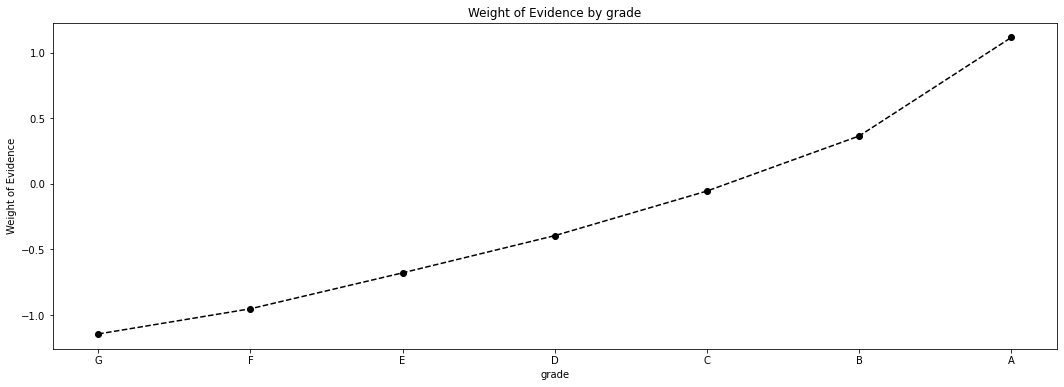

In [49]:
plot_by_woe(df_temp,0)

In [50]:
df_temp=woe_discrete(loan_data,'home_ownership','good_bad')
df_temp

,home_ownership,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,OTHER,182,0.000347,0.000746,144.0,38.0,-0.765617,-0.000399,0.000305,inf
1,NONE,50,0.000101,0.000157,42.0,8.0,-0.439616,-0.000056,0.000025,inf
2,RENT,188473,0.396579,0.466312,164706.0,23767.0,-0.161980,-0.069733,0.011295,inf
3,OWN,41704,0.089544,0.088585,37189.0,4515.0,0.010764,0.000959,0.000010,inf
4,MORTGAGE,235875,0.513427,0.444200,213235.0,22640.0,0.144832,0.069227,0.010026,inf
5,ANY,1,0.000002,0.000000,1.0,0.0,inf,0.000002,inf,inf


In [51]:
loan_data['home_ownership']=loan_data['home_ownership'].map({'RENT':'RENT_OTHER_NONE_ANY',
                                 'OTHER':'RENT_OTHER_NONE_ANY',
                                 'NONE':'RENT_OTHER_NONE_ANY',
                                 'ANY':'RENT_OTHER_NONE_ANY',
                                 'OWN':'OWN',
                                 'MORTGAGE':'MORTGAGE'
                                })

In [52]:
df_temp=woe_discrete(loan_data,'home_ownership','good_bad')
df_temp

,home_ownership,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,RENT_OTHER_NONE_ANY,188706,0.397029,0.467215,164893.0,23813.0,-0.162779,-0.070185,0.011425,0.021461
1,OWN,41704,0.089544,0.088585,37189.0,4515.0,0.010764,0.000959,0.000010,0.021461
2,MORTGAGE,235875,0.513427,0.444200,213235.0,22640.0,0.144832,0.069227,0.010026,0.021461


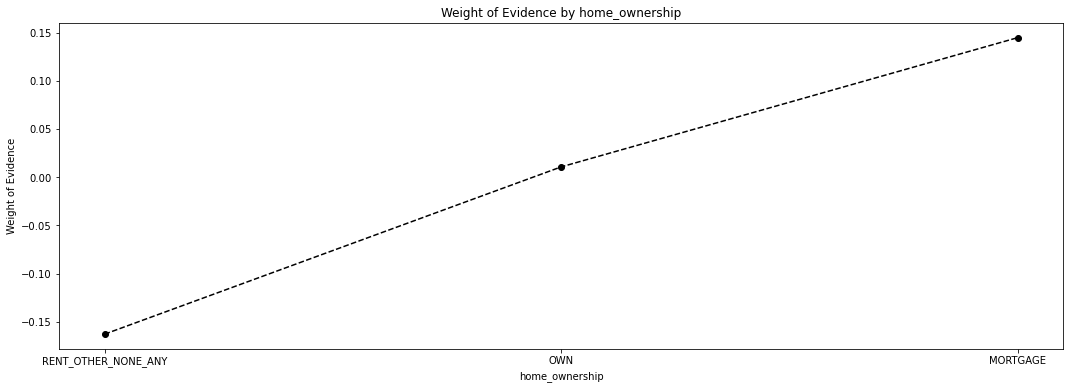

In [53]:
plot_by_woe(df_temp,0)

In [54]:
df_temp=woe_discrete(loan_data,'addr_state','good_bad')
df_temp

,addr_state,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,NE,14,0.000014,0.000157,6.0,8.0,-2.385526,-0.000143,3.399719e-04,inf
1,IA,14,0.000026,0.000059,11.0,3.0,-0.798561,-0.000032,2.585315e-05,inf
2,NV,6519,0.013544,0.017540,5625.0,894.0,-0.258574,-0.003997,1.033402e-03,inf
3,HI,2487,0.005232,0.006161,2173.0,314.0,-0.163373,-0.000929,1.517051e-04,inf
4,FL,31637,0.066626,0.077814,27671.0,3966.0,-0.155217,-0.011187,1.736464e-03,inf
5,AL,5853,0.012352,0.014185,5130.0,723.0,-0.138392,-0.001833,2.537231e-04,inf
6,NY,40242,0.085576,0.092234,35541.0,4701.0,-0.074932,-0.006659,4.989558e-04,inf
7,LA,5489,0.011675,0.012557,4849.0,640.0,-0.072784,-0.000881,6.415804e-05,inf
8,NM,2588,0.005511,0.005866,2289.0,299.0,-0.062417,-0.000355,2.215649e-05,inf
9,OK,4117,0.008769,0.009320,3642.0,475.0,-0.060871,-0.000550,3.350125e-05,inf


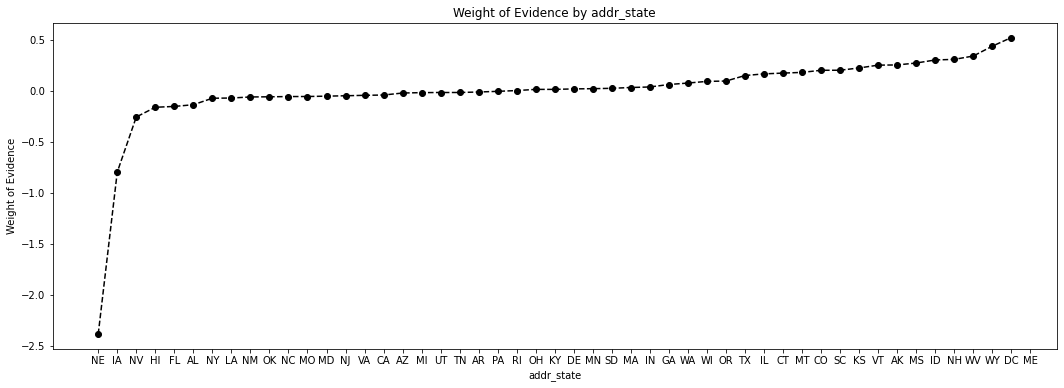

In [55]:
plot_by_woe(df_temp,0)

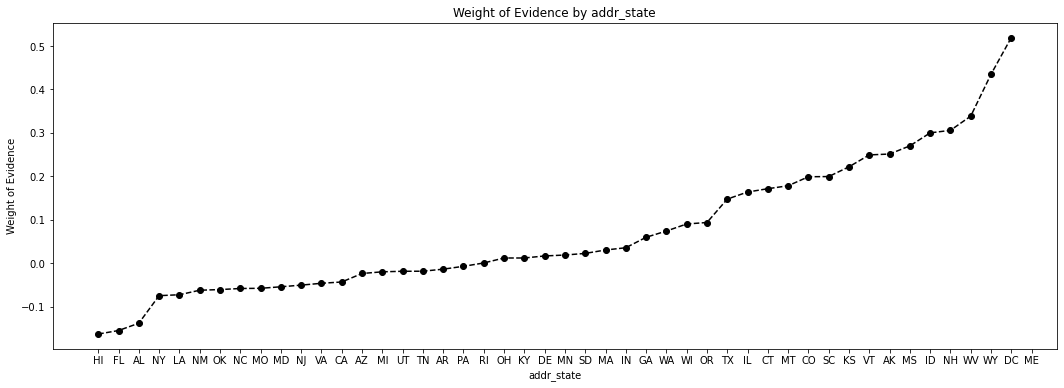

In [56]:
plot_by_woe(df_temp.iloc[3:,:],0)

In [57]:
loan_data['addr_state']=loan_data['addr_state'].map({
    'NE':'NE_IA_NV', 'IA':'NE_IA_NV', 'NV':'NE_IA_NV', 
    'HI':'HI_FL_AL_NY', 'FL':'HI_FL_AL_NY', 'AL':'HI_FL_AL_NY', 'NY':'HI_FL_AL_NY',
    'LA':'LA_NM_OK_NC', 'NM':'LA_NM_OK_NC', 'OK':'LA_NM_OK_NC', 'NC':'LA_NM_OK_NC',
    'MO':'MO_MD_NJ_VA_CA_MD', 'NJ':'MO_MD_NJ_VA_CA_MD', 'VA':'MO_MD_NJ_VA_CA_MD', 'CA':'MO_MD_NJ_VA_CA_MD', 
    'AZ': 'AZ_MI_UT_TN_AR_PA', 'MI': 'AZ_MI_UT_TN_AR_PA', 'UT': 'AZ_MI_UT_TN_AR_PA', 'TN':'AZ_MI_UT_TN_AR_PA', 'AR': 'AZ_MI_UT_TN_AR_PA', 'PA': 'AZ_MI_UT_TN_AR_PA',
    'RI':'RI_OH_KY_DE_MN_SD', 'OH':'RI_OH_KY_DE_MN_SD', 'KY':'RI_OH_KY_DE_MN_SD', 'DE':'RI_OH_KY_DE_MN_SD', 'MN':'RI_OH_KY_DE_MN_SD', 'SD':'RI_OH_KY_DE_MN_SD',
    'MA':'MA_IN_GA_WA_WI_OR', 'IN':'MA_IN_GA_WA_WI_OR', 'GA':'MA_IN_GA_WA_WI_OR', 'WA':'MA_IN_GA_WA_WI_OR', 'WI':'MA_IN_GA_WA_WI_OR','OR':'MA_IN_GA_WA_WI_OR', 
    'TX':'TX_IL_CT_MT_CO_SC_KS', 'IL':'TX_IL_CT_MT_CO_SC_KS', 'CT':'TX_IL_CT_MT_CO_SC_KS', 'MT':'TX_IL_CT_MT_CO_SC_KS', 'CO':'TX_IL_CT_MT_CO_SC_KS', 'SC':'TX_IL_CT_MT_CO_SC_KS', 'KS':'TX_IL_CT_MT_CO_SC_KS', 
    'VT':'VT_AK_MS_ID_NH_WV', 'AK':'VT_AK_MS_ID_NH_WV', 'MS':'VT_AK_MS_ID_NH_WV','ID':'VT_AK_MS_ID_NH_WV', 'NH':'VT_AK_MS_ID_NH_WV','WV':'VT_AK_MS_ID_NH_WV', 
    'WY': 'WY_DC_ME','DC': 'WY_DC_ME', 'ME': 'WY_DC_ME'
                                }) #Sparse class grouping

In [58]:
df_temp=woe_discrete(loan_data,'addr_state','good_bad')
df_temp

,addr_state,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,NE_IA_NV,6547,0.013910,0.018206,5642.0,905.0,-0.269127,-0.004296,0.001156,0.011996
1,HI_FL_AL_NY,80219,0.173853,0.195216,70515.0,9704.0,-0.115899,-0.021363,0.002476,0.011996
2,LA_NM_OK_NC,24876,0.054245,0.057816,22002.0,2874.0,-0.063758,-0.003571,0.000228,0.011996
3,MO_MD_NJ_VA_CA_MD,111241,0.243034,0.254803,98575.0,12666.0,-0.047290,-0.011769,0.000557,0.011996
4,AZ_MI_UT_TN_AR_PA,51585,0.113079,0.115070,45865.0,5720.0,-0.017453,-0.001991,0.000035,0.011996
5,RI_OH_KY_DE_MN_SD,32135,0.070670,0.069826,28664.0,3471.0,0.012013,0.000844,0.000010,0.011996
6,MA_IN_GA_WA_WI_OR,54949,0.121444,0.114486,49258.0,5691.0,0.058999,0.006958,0.000411,0.011996
7,TX_IL_CT_MT_CO_SC_KS,83163,0.185744,0.157416,75338.0,7825.0,0.165475,0.028327,0.004687,0.011996
8,VT_AK_MS_ID_NH_WV,8038,0.018158,0.013539,7365.0,673.0,0.293563,0.004619,0.001356,0.011996
9,WY_DC_ME,2558,0.005863,0.003621,2378.0,180.0,0.481872,0.002242,0.001080,0.011996


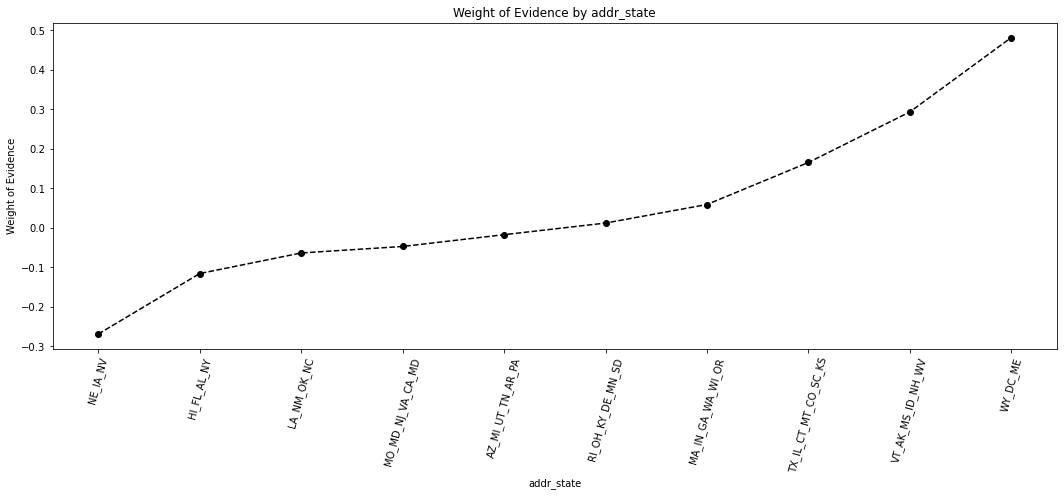

In [59]:
plot_by_woe(df_temp,75)

In [60]:
df_temp=woe_discrete(loan_data,'verification_status','good_bad')
df_temp

,verification_status,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,Verified,168055,0.353104,0.419969,146650.0,21405.0,-0.173420,-0.066866,0.011596,0.020831
1,Source Verified,149993,0.323550,0.306408,134376.0,15617.0,0.054438,0.017143,0.000933,0.020831
2,Not Verified,148237,0.323346,0.273623,134291.0,13946.0,0.166972,0.049723,0.008302,0.020831


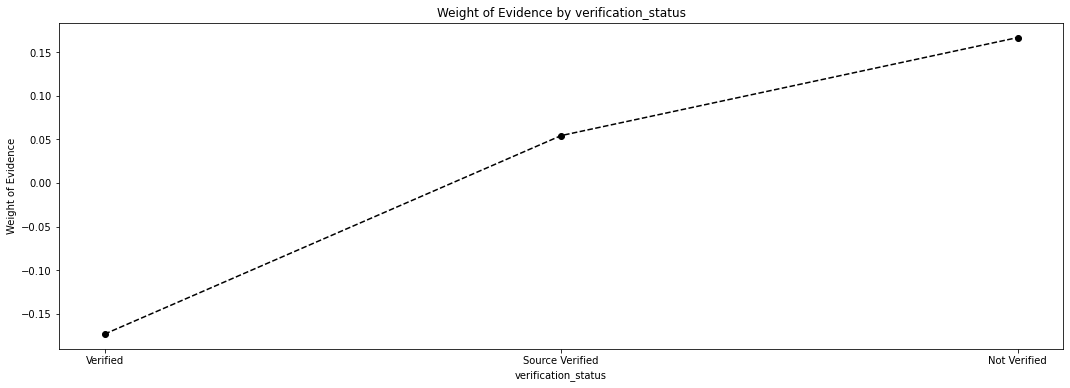

In [61]:
plot_by_woe(df_temp,0)

In [62]:
df_temp=woe_discrete(loan_data,'purpose','good_bad')
df_temp

,purpose,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,small_business,7013,0.013243,0.029685,5500.0,1513.0,-0.807190,-0.016442,0.013272,0.03698
1,educational,422,0.000804,0.001727,334.0,88.0,-0.764040,-0.000922,0.000705,0.03698
2,renewable_energy,351,0.000715,0.001059,297.0,54.0,-0.393096,-0.000344,0.000135,0.03698
3,moving,2994,0.006109,0.008966,2537.0,457.0,-0.383790,-0.002858,0.001097,0.03698
4,house,2269,0.004698,0.006239,1951.0,318.0,-0.283798,-0.001542,0.000438,0.03698
5,other,23690,0.049170,0.064138,20421.0,3269.0,-0.265764,-0.014969,0.003978,0.03698
6,medical,4602,0.009597,0.012086,3986.0,616.0,-0.230548,-0.002489,0.000574,0.03698
7,wedding,2343,0.004955,0.005592,2058.0,285.0,-0.120843,-0.000636,0.000077,0.03698
8,vacation,2487,0.005283,0.005749,2194.0,293.0,-0.084535,-0.000466,0.000039,0.03698
9,debt_consolidation,274195,0.585399,0.609579,243126.0,31069.0,-0.040475,-0.024180,0.000979,0.03698


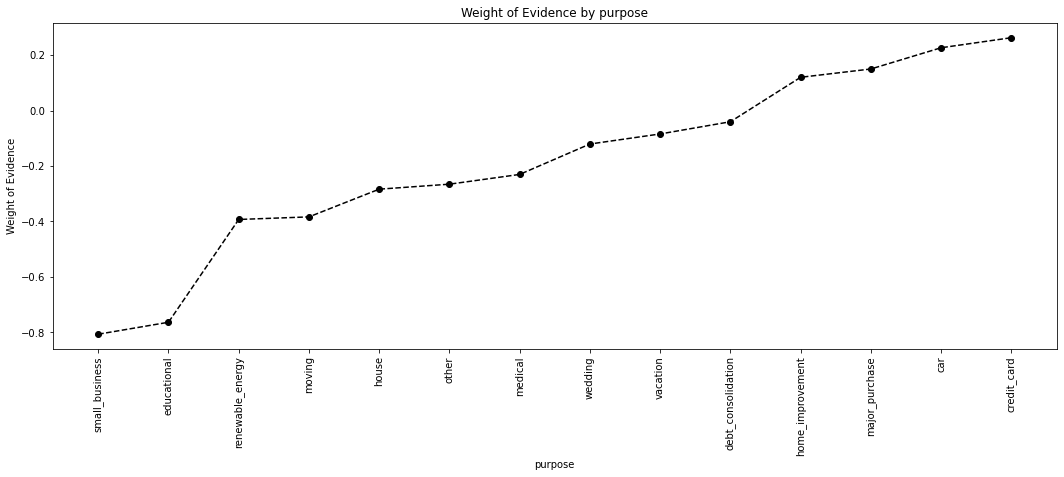

In [63]:
plot_by_woe(df_temp, 90)

In [64]:
loan_data['purpose']=loan_data['purpose'].map({  
    'small_business':'small_business_educational', 'educational':'small_business_educational', 
    'renewable_energy':'energy_moving_house_other', 'moving':'energy_moving_house_other', 'house':'energy_moving_house_other', 'other':'energy_moving_house_other',
    'medical':'medical_wedding_vacation_debt', 'wedding':'medical_wedding_vacation_debt', 'vacation':'medical_wedding_vacation_debt', 'debt_consolidation':'medical_wedding_vacation_debt', 
    'home_improvement':'home_purchase_car__card', 'major_purchase':'home_purchase_car__card', 'car':'home_purchase_car__card','credit_card':'home_purchase_car__card'
        })

In [65]:
df_temp=woe_discrete(loan_data,'purpose','good_bad')
df_temp

,purpose,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,small_business_educational,7435,0.014047,0.031412,5834.0,1601.0,-0.804770,-0.017365,0.013975,0.035449
1,energy_moving_house_other,29304,0.060691,0.080403,25206.0,4098.0,-0.281261,-0.019712,0.005544,0.035449
2,medical_wedding_vacation_debt,283627,0.605234,0.633005,251364.0,32263.0,-0.044863,-0.027771,0.001246,0.035449
3,home_purchase_car__card,145919,0.320028,0.255180,132913.0,13006.0,0.226440,0.064848,0.014684,0.035449


In [66]:
df_temp=woe_discrete(loan_data,'initial_list_status','good_bad')
df_temp

,initial_list_status,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,f,303005,0.641801,0.715233,266551.0,36454.0,-0.108330,-0.073432,0.007955,0.024801
1,w,163280,0.358199,0.284767,148766.0,14514.0,0.229417,0.073432,0.016846,0.024801


In [67]:
# Get_Dummies Discrete Variable

In [68]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [69]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [70]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [71]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'tot

# Preprocessing Continuous Variables

In [72]:
def woe_continuous(df1,discrete_variable,dependet_variable):
    df1=df1[[discrete_variable,dependet_variable]]
    df1=pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()],axis=1)
    df1=df1.iloc[:,[0,1,3]]
    df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
    df1['prop_bad']=1-df1['prop_good']
    df1['n_good']=df1['n_obs']*df1['prop_good']
    df1['n_bad']=df1['n_obs']-df1['n_good']
    df1['prop_good']=df1['n_good']/df1['n_good'].sum()
    df1['prop_bad']=df1['n_bad']/df1['n_bad'].sum()
    df1['WoE'] = np.log(df1['prop_good'] / df1['prop_bad'])
    #df1 = df1.sort_values(['WoE'])
    #df1 = df1.reset_index(drop = True)
    df1['prop_good - prop_bad']=df1['prop_good']-df1['prop_bad']
    df1['WoE*(prop_good - prop_bad)'] = df1['WoE']*df1['prop_good - prop_bad']
    df1['IV']=df1['WoE*(prop_good - prop_bad)'].sum()
    return df1

In [73]:
df_temp=woe_continuous(loan_data,'term_int','good_bad')
df_temp

,term_int,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,36,337953,0.734723,0.643737,305143.0,32810.0,0.132203,0.090986,0.012029,0.03886
1,60,128332,0.265277,0.356263,110174.0,18158.0,-0.294894,-0.090986,0.026831,0.03886


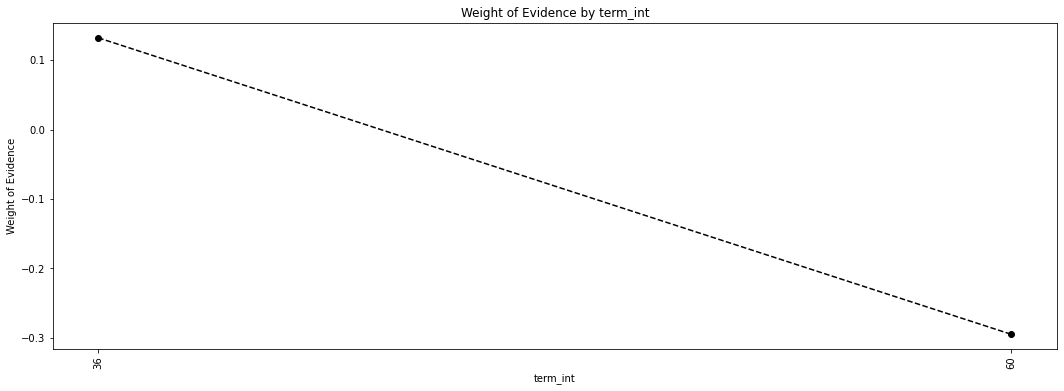

In [74]:
plot_by_woe(df_temp, 90)

In [75]:
loan_data['term_int:36'] = np.where((loan_data['term_int'] == 36), 1, 0)
loan_data['term_int:60'] = np.where((loan_data['term_int'] == 60), 1, 0)

In [76]:
df_temp=woe_discrete(loan_data,'emp_length_int','good_bad')
df_temp

,emp_length_int,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,0.0,57273,0.120804,0.139323,50172.0,7101.0,-0.142623,-0.018519,2.641172e-03,0.006611
1,6.0,26112,0.055509,0.059998,23054.0,3058.0,-0.077766,-0.004489,3.490931e-04,0.006611
2,5.0,30774,0.065579,0.069416,27236.0,3538.0,-0.056866,-0.003837,2.182111e-04,0.006611
3,9.0,17888,0.038243,0.039338,15883.0,2005.0,-0.028239,-0.001095,3.093085e-05,0.006611
4,1.0,29622,0.063344,0.065021,26308.0,3314.0,-0.026127,-0.001677,4.380978e-05,0.006611
5,7.0,26180,0.056017,0.057193,23265.0,2915.0,-0.020764,-0.001175,2.440366e-05,0.006611
6,8.0,22395,0.047987,0.048364,19930.0,2465.0,-0.007810,-0.000376,2.938335e-06,0.006611
7,2.0,41373,0.088684,0.089095,36832.0,4541.0,-0.004624,-0.000411,1.900841e-06,0.006611
8,4.0,28023,0.060079,0.060253,24952.0,3071.0,-0.002893,-0.000174,5.036855e-07,0.006611
9,3.0,36596,0.078465,0.078638,32588.0,4008.0,-0.002192,-0.000172,3.775463e-07,0.006611


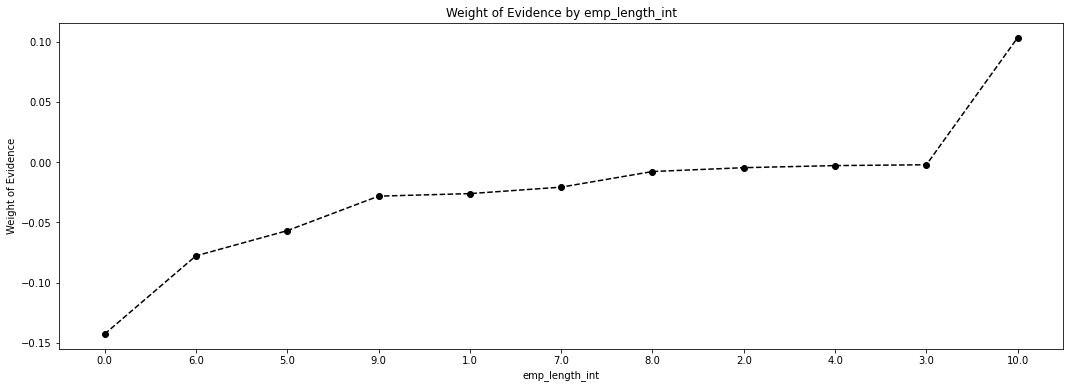

In [77]:
plot_by_woe(df_temp, 0)

In [78]:
loan_data['emp_length:0'] = np.where(loan_data['emp_length_int'].isin([0]), 1, 0)
loan_data['emp_length:1'] = np.where(loan_data['emp_length_int'].isin([1]), 1, 0)
loan_data['emp_length:2-4'] = np.where(loan_data['emp_length_int'].isin(range(2, 5)), 1, 0)
loan_data['emp_length:5-6'] = np.where(loan_data['emp_length_int'].isin(range(5, 7)), 1, 0)
loan_data['emp_length:7-9'] = np.where(loan_data['emp_length_int'].isin(range(7, 10)), 1, 0)
loan_data['emp_length:10'] = np.where(loan_data['emp_length_int'].isin([10]), 1, 0)

In [79]:
df_temp=woe_continuous(loan_data,'delinq_2yrs','good_bad')
df_temp

,delinq_2yrs,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,0.0,382983,0.821252,0.822143,341080.0,41903.0,-0.001084,-0.000891,9.663761e-07,inf
1,1.0,56224,0.120847,0.118388,50190.0,6034.0,0.020562,0.002459,5.056995e-05,inf
2,2.0,16310,0.034882,0.035768,14487.0,1823.0,-0.025076,-0.000886,2.221101e-05,inf
3,3.0,5684,0.012116,0.012792,5032.0,652.0,-0.054316,-0.000676,3.673349e-05,inf
4,4.0,2378,0.005131,0.004846,2131.0,247.0,0.057114,0.000285,1.626855e-05,inf
5,5.0,1236,0.002644,0.002708,1098.0,138.0,-0.023852,-0.000064,1.522187e-06,inf
6,6.0,629,0.001353,0.001315,562.0,67.0,0.028965,0.000039,1.119008e-06,inf
7,7.0,346,0.000727,0.000863,302.0,44.0,-0.171607,-0.000136,2.336106e-05,inf
8,8.0,177,0.000385,0.000334,160.0,17.0,0.144116,0.000052,7.451577e-06,inf
9,9.0,111,0.000241,0.000216,100.0,11.0,0.109431,0.000025,2.731201e-06,inf


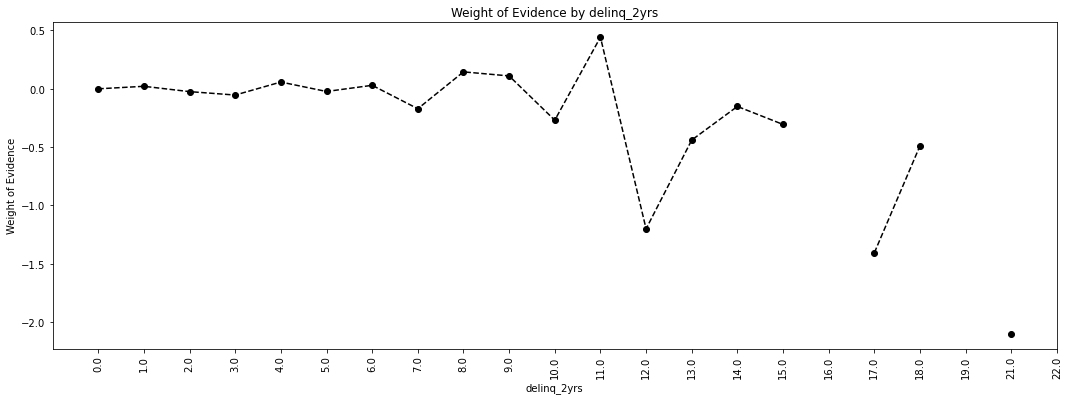

In [80]:
plot_by_woe(df_temp, 90)

In [81]:
loan_data['delinq_2yrs:0'] = np.where((loan_data['delinq_2yrs'] == 0), 1, 0)
loan_data['delinq_2yrs:1-3'] = np.where((loan_data['delinq_2yrs'] >= 1) & (loan_data['delinq_2yrs'] <= 3), 1, 0)
loan_data['delinq_2yrs:>=4'] = np.where((loan_data['delinq_2yrs'] >= 9), 1, 0)

In [82]:
df_temp=woe_continuous(loan_data,'inq_last_6mths','good_bad')
df_temp

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,0.0,241527,0.528473,0.432487,219484.0,22043.0,0.200440,0.095986,0.019240,inf
1,1.0,130148,0.277157,0.295087,115108.0,15040.0,-0.062687,-0.017930,0.001124,inf
2,2.0,57825,0.120241,0.154744,49938.0,7887.0,-0.252278,-0.034503,0.008704,inf
3,3.0,25126,0.050879,0.078383,21131.0,3995.0,-0.432147,-0.027503,0.011885,inf
4,4.0,7241,0.014767,0.021739,6133.0,1108.0,-0.386717,-0.006972,0.002696,inf
5,5.0,2768,0.005521,0.009320,2293.0,475.0,-0.523543,-0.003798,0.001989,inf
6,6.0,1188,0.002242,0.005042,931.0,257.0,-0.810661,-0.002801,0.002270,inf
7,7.0,195,0.000306,0.001334,127.0,68.0,-1.473165,-0.001028,0.001515,inf
8,8.0,122,0.000183,0.000903,76.0,46.0,-1.595752,-0.000720,0.001148,inf
9,9.0,50,0.000077,0.000353,32.0,18.0,-1.522480,-0.000276,0.000420,inf


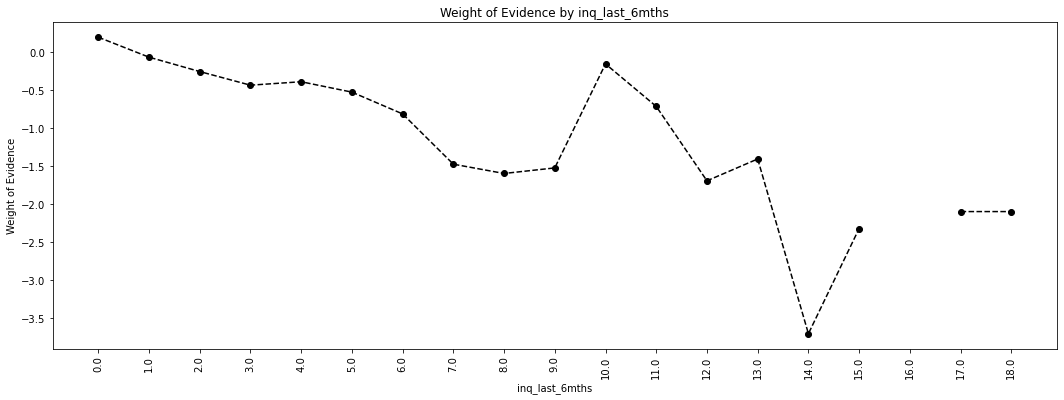

In [83]:
plot_by_woe(df_temp, 90)

In [84]:
loan_data['inq_last_6mths:0'] = np.where((loan_data['inq_last_6mths'] == 0), 1, 0)
loan_data['inq_last_6mths:1-2'] = np.where((loan_data['inq_last_6mths'] >= 1) & (loan_data['inq_last_6mths'] <= 2), 1, 0)
loan_data['inq_last_6mths:3-6'] = np.where((loan_data['inq_last_6mths'] >= 3) & (loan_data['inq_last_6mths'] <= 6), 1, 0)
loan_data['inq_last_6mths:>6'] = np.where((loan_data['inq_last_6mths'] > 6), 1, 0)

In [85]:
df_temp=woe_continuous(loan_data,'open_acc','good_bad')
df_temp

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,open_acc,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,0.0,36,0.000070,0.000137,29.0,7.0,-0.676458,-0.000068,0.000046,inf
1,1.0,142,0.000299,0.000353,124.0,18.0,-0.167934,-0.000055,0.000009,inf
2,2.0,1790,0.003638,0.005474,1511.0,279.0,-0.408529,-0.001836,0.000750,inf
3,3.0,5500,0.011514,0.014087,4782.0,718.0,-0.201700,-0.002573,0.000519,inf
4,4.0,12588,0.027025,0.026762,11224.0,1364.0,0.009789,0.000263,0.000003,inf
...,...,...,...,...,...,...,...,...,...,...
57,61.0,1,0.000002,0.000000,1.0,0.0,inf,0.000002,inf,inf
58,62.0,1,0.000002,0.000000,1.0,0.0,inf,0.000002,inf,inf
59,75.0,1,0.000002,0.000000,1.0,0.0,inf,0.000002,inf,inf
60,76.0,2,0.000000,0.000039,0.0,2.0,-inf,-0.000039,inf,inf


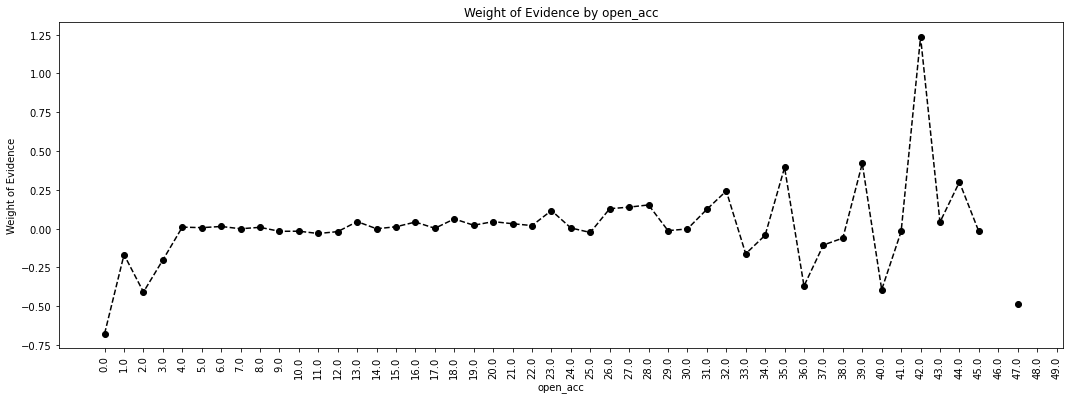

In [86]:
plot_by_woe(df_temp, 90)

In [87]:
loan_data['open_acc:0'] = np.where((loan_data['open_acc'] == 0), 1, 0)
loan_data['open_acc:1-3'] = np.where((loan_data['open_acc'] >= 1) & (loan_data['open_acc'] <= 3), 1, 0)
loan_data['open_acc:4-22'] = np.where((loan_data['open_acc'] >= 4) & (loan_data['open_acc'] <= 22), 1, 0)
loan_data['open_acc:23-32'] = np.where((loan_data['open_acc'] >= 23) & (loan_data['open_acc'] <= 32), 1, 0)
loan_data['open_acc:33-40'] = np.where((loan_data['open_acc'] >= 33) & (loan_data['open_acc'] <= 40), 1, 0)
loan_data['open_acc:>=41'] = np.where((loan_data['open_acc'] >= 31), 1, 0)

In [88]:
df_temp=woe_continuous(loan_data,'pub_rec','good_bad')
df_temp

,pub_rec,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,0.0,404922,0.867518,0.875589,360295.0,44627.0,-0.009260,-0.008071,0.000075,inf
1,1.0,53051,0.114320,0.109323,47479.0,5572.0,0.044689,0.004996,0.000223,inf
2,2.0,5624,0.012234,0.010654,5081.0,543.0,0.138310,0.001580,0.000219,inf
3,3.0,1611,0.003554,0.002649,1476.0,135.0,0.293972,0.000905,0.000266,inf
4,4.0,520,0.001139,0.000922,473.0,47.0,0.211104,0.000217,0.000046,inf
5,5.0,276,0.000604,0.000491,251.0,25.0,0.208733,0.000114,0.000024,inf
6,6.0,136,0.000303,0.000196,126.0,10.0,0.435853,0.000107,0.000047,inf
7,7.0,62,0.000137,0.000098,57.0,5.0,0.335769,0.000039,0.000013,inf
8,8.0,29,0.000067,0.000020,28.0,1.0,1.234360,0.000048,0.000059,inf
9,9.0,16,0.000031,0.000059,13.0,3.0,-0.631507,-0.000028,0.000017,inf


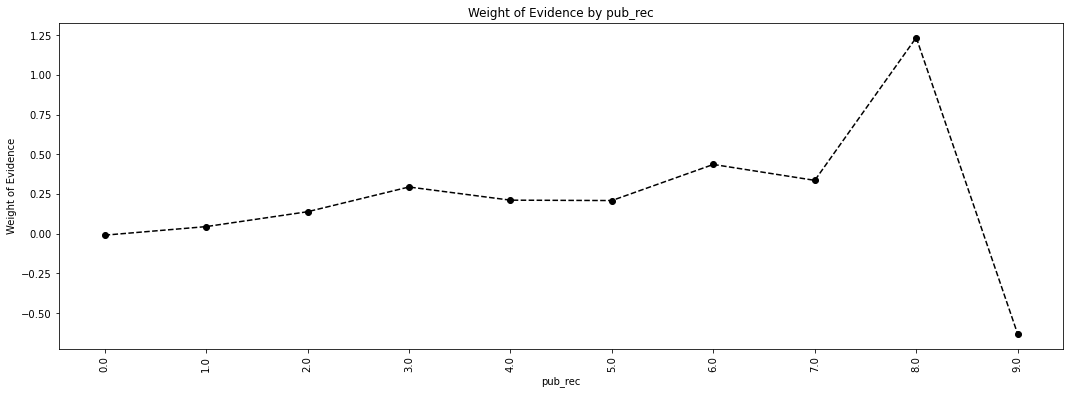

In [89]:
plot_by_woe(df_temp, 90)

In [90]:
loan_data['pub_rec:0-2'] = np.where((loan_data['pub_rec'] >= 0) & (loan_data['pub_rec'] <= 2), 1, 0)
loan_data['pub_rec:3-4'] = np.where((loan_data['pub_rec'] >= 3) & (loan_data['pub_rec'] <= 4), 1, 0)
loan_data['pub_rec:>=5'] = np.where((loan_data['pub_rec'] >= 5), 1, 0)

In [91]:
loan_data['total_acc_factor'] = pd.cut(loan_data['total_acc'],10)
loan_data['total_acc_factor'].unique()

[(-0.156, 15.6], (31.2, 46.8], (15.6, 31.2], (46.8, 62.4], (78.0, 93.6], (62.4, 78.0], (93.6, 109.2], (140.4, 156.0], (109.2, 124.8]]
Categories (10, interval[float64, right]): [(-0.156, 15.6] < (15.6, 31.2] < (31.2, 46.8] < (46.8, 62.4] ... (93.6, 109.2] < (109.2, 124.8] < (124.8, 140.4] < (140.4, 156.0]]

In [92]:
df_temp=woe_continuous(loan_data,'total_acc_factor','good_bad')
df_temp

,total_acc_factor,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,"(-0.156, 15.6]",100246,0.211920,0.239994,88014.0,12232.0,-0.124404,-0.028074,0.003492,inf
1,"(15.6, 31.2]",245942,0.528119,0.521994,219337.0,26605.0,0.011666,0.006125,0.000071,inf
2,"(31.2, 46.8]",96515,0.208869,0.191650,86747.0,9768.0,0.086040,0.017220,0.001482,inf
3,"(46.8, 62.4]",20896,0.045283,0.040987,18807.0,2089.0,0.099700,0.004297,0.000428,inf
4,"(62.4, 78.0]",2469,0.005336,0.004964,2216.0,253.0,0.072225,0.000372,0.000027,inf
5,"(78.0, 93.6]",184,0.000397,0.000373,165.0,19.0,0.063662,0.000025,0.000002,inf
6,"(93.6, 109.2]",25,0.000055,0.000039,23.0,2.0,0.344503,0.000016,0.000006,inf
7,"(109.2, 124.8]",6,0.000014,0.000000,6.0,0.0,inf,0.000014,inf,inf
8,"(124.8, 140.4]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(140.4, 156.0]",2,0.000005,0.000000,2.0,0.0,inf,0.000005,inf,inf


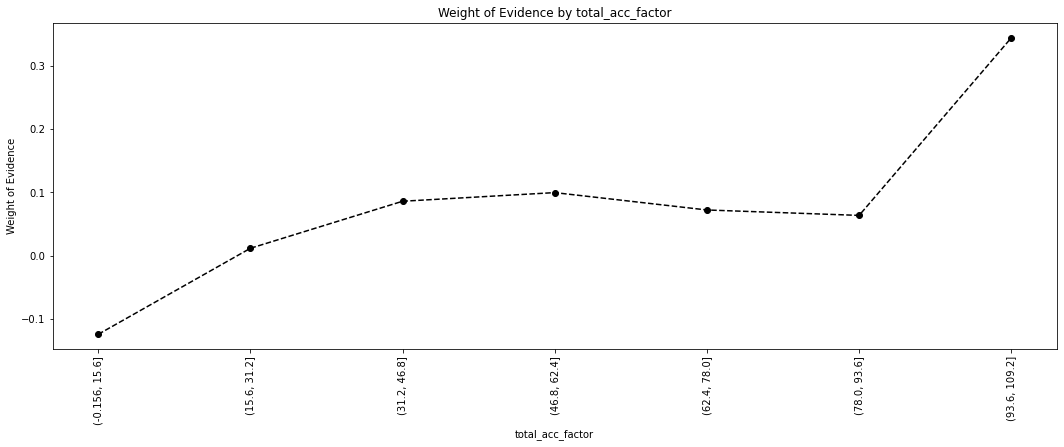

In [93]:
plot_by_woe(df_temp,90)

In [94]:
loan_data['total_acc:<=16'] = np.where((loan_data['total_acc'] <= 16), 1, 0)
loan_data['total_acc:17-93'] = np.where((loan_data['total_acc'] >= 17) & (loan_data['total_acc'] <= 93), 1, 0)
loan_data['total_acc:>93'] = np.where((loan_data['total_acc'] >93), 1, 0)

In [95]:
df_temp=woe_continuous(loan_data,'acc_now_delinq','good_bad')
df_temp

,acc_now_delinq,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,0.0,464553,0.996275,0.996370,413770.0,50783.0,-0.000095,-0.000095,9.084479e-09,inf
1,1.0,1623,0.003491,0.003394,1450.0,173.0,0.028183,0.000097,2.734397e-06,inf
2,2.0,92,0.000200,0.000177,83.0,9.0,0.123772,0.000023,2.879673e-06,inf
3,3.0,11,0.000022,0.000039,9.0,2.0,-0.593767,-0.000018,1.043255e-05,inf
4,4.0,4,0.000010,0.000000,4.0,0.0,inf,0.000010,inf,inf
5,5.0,2,0.000002,0.000020,1.0,1.0,-2.097844,-0.000017,3.610884e-05,inf


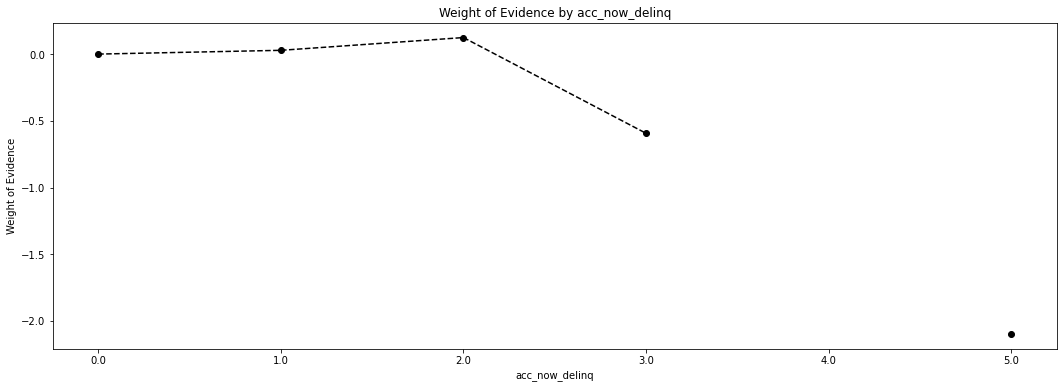

In [96]:
plot_by_woe(df_temp,0)

In [97]:
loan_data['acc_now_delinq:0'] = np.where((loan_data['acc_now_delinq'] == 0), 1, 0)
loan_data['acc_now_delinq:>=1'] = np.where((loan_data['acc_now_delinq'] >= 1), 1, 0)

In [98]:
loan_data['mths_since_issue_d_factor'] = pd.cut(loan_data['mths_since_issue_d'], 10)
loan_data['mths_since_issue_d_factor'].unique()

[(63.0, 72.0], (72.0, 81.0], (81.0, 90.0], (90.0, 99.0], (99.0, 108.0], (108.0, 117.0], (117.0, 126.0], (45.0, 54.0], (54.0, 63.0], (35.91, 45.0]]
Categories (10, interval[float64, right]): [(35.91, 45.0] < (45.0, 54.0] < (54.0, 63.0] < (63.0, 72.0] ... (90.0, 99.0] < (99.0, 108.0] < (108.0, 117.0] < (117.0, 126.0]]

In [99]:
df_temp=woe_continuous(loan_data,'mths_since_issue_d_factor','good_bad')
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,"(35.91, 45.0]",204731,0.453735,0.319553,188444.0,16287.0,0.350590,0.134182,0.047043,0.095634
1,"(45.0, 54.0]",123177,0.262855,0.274859,109168.0,14009.0,-0.044656,-0.012004,0.000536,0.095634
2,"(54.0, 63.0]",67273,0.138824,0.188687,57656.0,9617.0,-0.306882,-0.049863,0.015302,0.095634
3,"(63.0, 72.0]",30836,0.062015,0.099670,25756.0,5080.0,-0.474488,-0.037655,0.017867,0.095634
4,"(72.0, 81.0]",16776,0.034412,0.048736,14292.0,2484.0,-0.348014,-0.014324,0.004985,0.095634
5,"(81.0, 90.0]",11142,0.022939,0.031687,9527.0,1615.0,-0.323049,-0.008747,0.002826,0.095634
6,"(90.0, 99.0]",6504,0.013655,0.016344,5671.0,833.0,-0.179757,-0.002689,0.000483,0.095634
7,"(99.0, 108.0]",3103,0.006438,0.008417,2674.0,429.0,-0.267970,-0.001979,0.000530,0.095634
8,"(108.0, 117.0]",1529,0.002933,0.006102,1218.0,311.0,-0.732672,-0.003169,0.002322,0.095634
9,"(117.0, 126.0]",1214,0.002194,0.005945,911.0,303.0,-0.997034,-0.003751,0.003740,0.095634


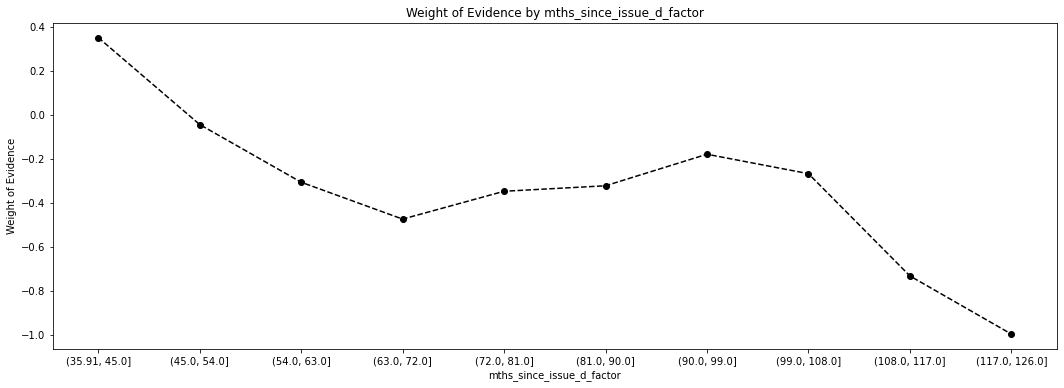

In [100]:
plot_by_woe(df_temp, 0)

In [101]:
loan_data['mths_since_issue_d:<=45'] = np.where((loan_data['mths_since_issue_d'] <= 45), 1, 0)
loan_data['mths_since_issue_d:45-63'] = np.where((loan_data['mths_since_issue_d'] >45) & (loan_data['mths_since_issue_d'] <= 63), 1, 0)
loan_data['mths_since_issue_d:63-99'] = np.where((loan_data['mths_since_issue_d'] >63) & (loan_data['mths_since_issue_d'] <=99), 1, 0)
loan_data['mths_since_issue_d:>99'] = np.where((loan_data['mths_since_issue_d'] >99), 1, 0)

In [102]:
loan_data['int_rate_factor'] = pd.cut(loan_data['int_rate'], 50)
loan_data['int_rate_factor'].unique()

[(10.374, 10.786], (14.914, 15.327], (15.74, 16.153], (13.263, 13.676], (12.438, 12.85], ..., (24.409, 24.822], (9.135, 9.548], (25.647, 26.06], (24.822, 25.234], (25.234, 25.647]]
Length: 50
Categories (50, interval[float64, right]): [(5.399, 5.833] < (5.833, 6.246] < (6.246, 6.658] < (6.658, 7.071] ... (24.409, 24.822] < (24.822, 25.234] < (25.234, 25.647] < (25.647, 26.06]]

In [103]:
df_temp=woe_continuous(loan_data,'int_rate_factor','good_bad')
df_temp

,int_rate_factor,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,"(5.399, 5.833]",983,0.002280,0.000706,947.0,36.0,1.171936,0.001574,0.001844,0.347385
1,"(5.833, 6.246]",10545,0.024889,0.004081,10337.0,208.0,1.808103,0.020808,0.037624,0.347385
2,"(6.246, 6.658]",9800,0.022927,0.005454,9522.0,278.0,1.435895,0.017473,0.025089,0.347385
3,"(6.658, 7.071]",2293,0.005348,0.001413,2221.0,72.0,1.331203,0.003935,0.005238,0.347385
4,"(7.071, 7.484]",3947,0.009289,0.001746,3858.0,89.0,1.671424,0.007543,0.012608,0.347385
5,"(7.484, 7.897]",15826,0.036695,0.011497,15240.0,586.0,1.160515,0.025197,0.029242,0.347385
6,"(7.897, 8.31]",12116,0.027704,0.011968,11506.0,610.0,0.839321,0.015736,0.013207,0.347385
7,"(8.31, 8.722]",8274,0.019231,0.005631,7987.0,287.0,1.228244,0.013600,0.016704,0.347385
8,"(8.722, 9.135]",11923,0.026938,0.014421,11188.0,735.0,0.624882,0.012518,0.007822,0.347385
9,"(9.135, 9.548]",8271,0.019246,0.005454,7993.0,278.0,1.260856,0.013791,0.017389,0.347385


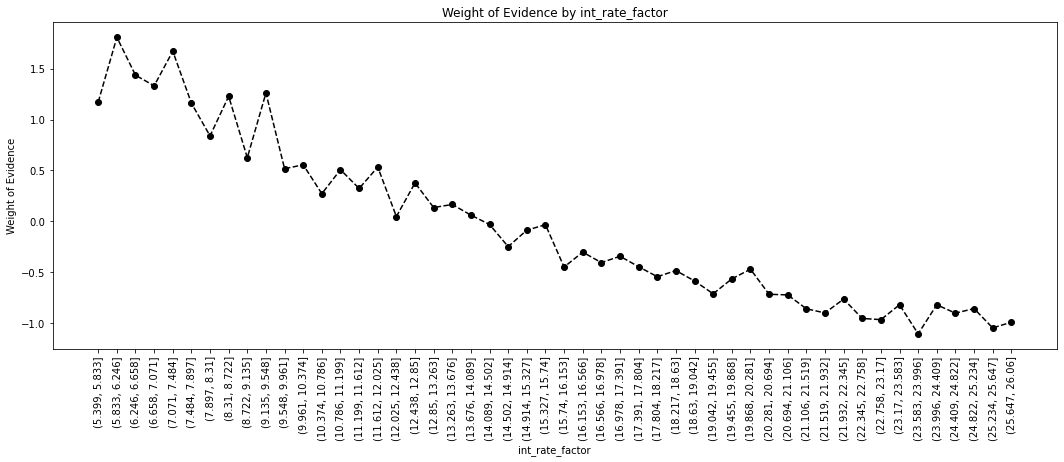

In [104]:
plot_by_woe(df_temp, 90)

In [105]:
loan_data['int_rate:<9.548'] = np.where((loan_data['int_rate'] <= 9.548), 1, 0)
loan_data['int_rate:9.548-12.025'] = np.where((loan_data['int_rate'] > 9.548) & (loan_data['int_rate'] <= 12.025), 1, 0)
loan_data['int_rate:12.025-15.74'] = np.where((loan_data['int_rate'] > 12.025) & (loan_data['int_rate'] <= 15.74), 1, 0)
loan_data['int_rate:15.74-20.281'] = np.where((loan_data['int_rate'] > 15.74) & (loan_data['int_rate'] <= 20.281), 1, 0)
loan_data['int_rate:>20.281'] = np.where((loan_data['int_rate'] > 20.281), 1, 0)


In [106]:
loan_data['funded_amnt_factor'] = pd.cut(loan_data['funded_amnt'], 10)
loan_data['funded_amnt_factor'].unique()

[(3950.0, 7400.0], (465.5, 3950.0], (7400.0, 10850.0], (10850.0, 14300.0], (17750.0, 21200.0], (14300.0, 17750.0], (31550.0, 35000.0], (24650.0, 28100.0], (21200.0, 24650.0], (28100.0, 31550.0]]
Categories (10, interval[float64, right]): [(465.5, 3950.0] < (3950.0, 7400.0] < (7400.0, 10850.0] < (10850.0, 14300.0] ... (21200.0, 24650.0] < (24650.0, 28100.0] < (28100.0, 31550.0] < (31550.0, 35000.0]]

In [107]:
df_temp=woe_continuous(loan_data,'funded_amnt_factor','good_bad')
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,"(465.5, 3950.0]",27963,0.060190,0.058174,24998.0,2965.0,0.034075,0.002016,0.000069,0.002006
1,"(3950.0, 7400.0]",75921,0.163848,0.154450,68049.0,7872.0,0.059072,0.009398,0.000555,0.002006
2,"(7400.0, 10850.0]",91738,0.196674,0.197300,81682.0,10056.0,-0.003180,-0.000626,0.000002,0.002006
3,"(10850.0, 14300.0]",65270,0.140615,0.134790,58400.0,6870.0,0.042308,0.005825,0.000246,0.002006
4,"(14300.0, 17750.0]",60850,0.130113,0.133652,54038.0,6812.0,-0.026842,-0.003540,0.000095,0.002006
5,"(17750.0, 21200.0]",57997,0.124139,0.126354,51557.0,6440.0,-0.017685,-0.002215,0.000039,0.002006
6,"(21200.0, 24650.0]",25426,0.054310,0.056310,22556.0,2870.0,-0.036155,-0.002000,0.000072,0.002006
7,"(24650.0, 28100.0]",26425,0.056559,0.057585,23490.0,2935.0,-0.017977,-0.001026,0.000018,0.002006
8,"(28100.0, 31550.0]",13333,0.028099,0.032628,11670.0,1663.0,-0.149446,-0.004529,0.000677,0.002006
9,"(31550.0, 35000.0]",21362,0.045452,0.048756,18877.0,2485.0,-0.070173,-0.003304,0.000232,0.002006


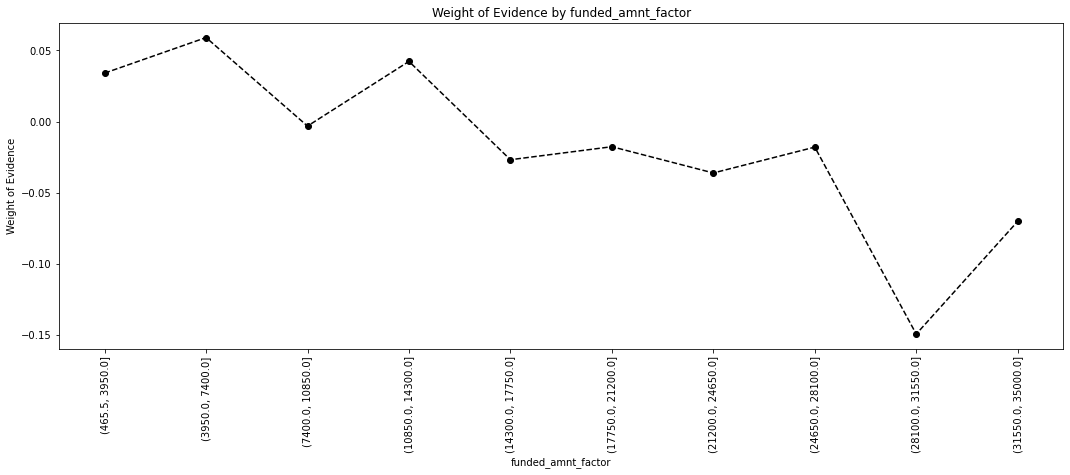

In [108]:
plot_by_woe(df_temp, 90)

In [109]:
loan_data['funded_amnt:<7400'] = np.where((loan_data['funded_amnt'] <= 7400), 1, 0)
loan_data['funded_amnt:7400-14300.0'] = np.where((loan_data['funded_amnt'] > 7400.0) & (loan_data['funded_amnt'] <= 14300.0), 1, 0)
loan_data['funded_amnt:14300.0-28100.0'] = np.where((loan_data['funded_amnt'] > 14300.0) & (loan_data['funded_amnt'] <= 28100.0), 1, 0)
loan_data['funded_amnt:>28100.0'] = np.where((loan_data['funded_amnt'] > 28100.0), 1, 0)

In [110]:
loan_data['mths_since_earliest_cr_line_factor'] = pd.cut(loan_data['mths_since_earliest_cr_line'], 10)
loan_data['mths_since_earliest_cr_line_factor'].unique()

[(352.2, 410.9], (176.1, 234.8], (234.8, 293.5], (117.4, 176.1], (293.5, 352.2], (410.9, 469.6], (58.7, 117.4], (469.6, 528.3], (528.3, 587.0], (-0.587, 58.7]]
Categories (10, interval[float64, right]): [(-0.587, 58.7] < (58.7, 117.4] < (117.4, 176.1] < (176.1, 234.8] ... (352.2, 410.9] < (410.9, 469.6] < (469.6, 528.3] < (528.3, 587.0]]

In [111]:
df_temp=woe_continuous(loan_data,'mths_since_earliest_cr_line_factor','good_bad')
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,"(-0.587, 58.7]",29,0.000063,0.000059,26.0,3.0,0.061640,0.000004,2.306773e-07,0.013367
1,"(58.7, 117.4]",13233,0.027767,0.033374,11532.0,1701.0,-0.183935,-0.005607,1.031347e-03,0.013367
2,"(117.4, 176.1]",87485,0.184620,0.212074,76676.0,10809.0,-0.138634,-0.027454,3.806046e-03,0.013367
3,"(176.1, 234.8]",154960,0.330678,0.345786,137336.0,17624.0,-0.044675,-0.015108,6.749561e-04,0.013367
4,"(234.8, 293.5]",106115,0.228700,0.218412,94983.0,11132.0,0.046030,0.010288,4.735773e-04,0.013367
5,"(293.5, 352.2]",52558,0.114445,0.098631,47531.0,5027.0,0.148715,0.015815,2.351862e-03,0.013367
6,"(352.2, 410.9]",29181,0.063922,0.051660,26548.0,2633.0,0.212986,0.012262,2.611723e-03,0.013367
7,"(410.9, 469.6]",12685,0.027897,0.021563,11586.0,1099.0,0.257553,0.006334,1.631394e-03,0.013367
8,"(469.6, 528.3]",6314,0.013876,0.010811,5763.0,551.0,0.249635,0.003065,7.652404e-04,0.013367
9,"(528.3, 587.0]",3725,0.008032,0.007632,3336.0,389.0,0.051104,0.000400,2.045086e-05,0.013367


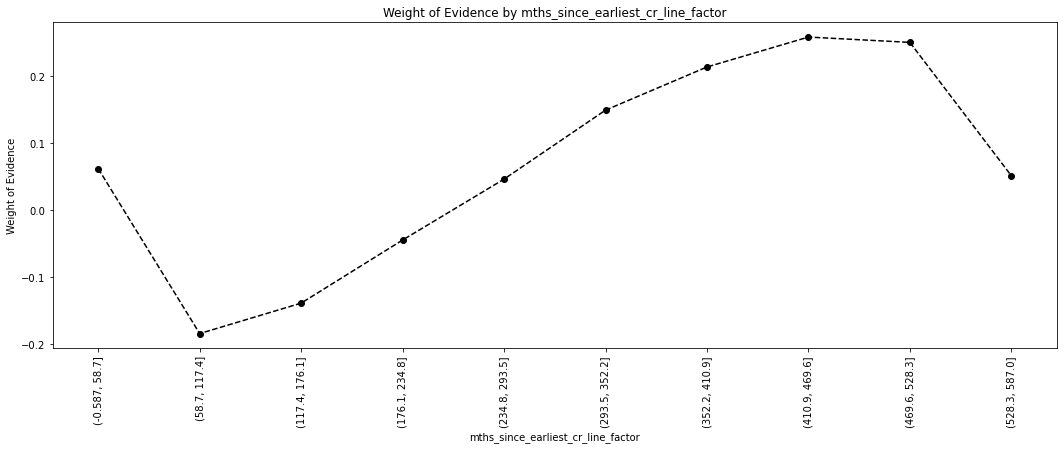

In [112]:
plot_by_woe(df_temp, 90)

In [113]:
loan_data['mths_since_earliest_cr_line:<117.4'] = np.where((loan_data['mths_since_earliest_cr_line'] <= 117.4), 1, 0)
loan_data['mths_since_earliest_cr_line:117.4-469.6'] = np.where((loan_data['mths_since_earliest_cr_line'] > 117.4) & (loan_data['mths_since_earliest_cr_line'] <=469.6 ), 1, 0)
loan_data['mths_since_earliest_cr_line:293.5-469.6'] = np.where((loan_data['mths_since_earliest_cr_line'] >293.5 ) & (loan_data['mths_since_earliest_cr_line'] <= 469.6), 1, 0)
loan_data['mths_since_earliest_cr_line:>469.6'] = np.where((loan_data['mths_since_earliest_cr_line'] > 469.6), 1, 0)

In [114]:
loan_data['mths_since_last_credit_pull_d_factor'] = pd.cut(loan_data['mths_since_last_credit_pull_d'], 10)
loan_data['mths_since_last_credit_pull_d_factor'].unique()

[(22.896, 33.4], (43.8, 54.2], (33.4, 43.8], (54.2, 64.6], (64.6, 75.0], ..., (85.4, 95.8], NaN, (116.6, 127.0], (95.8, 106.2], (106.2, 116.6]]
Length: 11
Categories (10, interval[float64, right]): [(22.896, 33.4] < (33.4, 43.8] < (43.8, 54.2] < (54.2, 64.6] ... (85.4, 95.8] < (95.8, 106.2] < (106.2, 116.6] < (116.6, 127.0]]

In [115]:
df_temp=woe_continuous(loan_data,'mths_since_last_credit_pull_d_factor','good_bad')
df_temp

,mths_since_last_credit_pull_d_factor,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,"(22.896, 33.4]",402752,0.882142,0.714552,366337.0,36415.0,0.210698,0.167590,0.035311,0.188237
1,"(33.4, 43.8]",33255,0.062088,0.146599,25784.0,7471.0,-0.859150,-0.084511,0.072608,0.188237
2,"(43.8, 54.2]",16183,0.028961,0.081551,12027.0,4156.0,-1.035274,-0.052590,0.054445,0.188237
3,"(54.2, 64.6]",7081,0.013181,0.031533,5474.0,1607.0,-0.872235,-0.018352,0.016007,0.188237
4,"(64.6, 75.0]",3475,0.006791,0.012853,2820.0,655.0,-0.638018,-0.006062,0.003868,0.188237
5,"(75.0, 85.4]",2118,0.004330,0.006279,1798.0,320.0,-0.371766,-0.001950,0.000725,0.188237
6,"(85.4, 95.8]",865,0.001640,0.003611,681.0,184.0,-0.789249,-0.001971,0.001555,0.188237
7,"(95.8, 106.2]",354,0.000556,0.002414,231.0,123.0,-1.467642,-0.001857,0.002726,0.188237
8,"(106.2, 116.6]",87,0.000137,0.000589,57.0,30.0,-1.456021,-0.000451,0.000657,0.188237
9,"(116.6, 127.0]",73,0.000173,0.000020,72.0,1.0,2.178791,0.000154,0.000335,0.188237


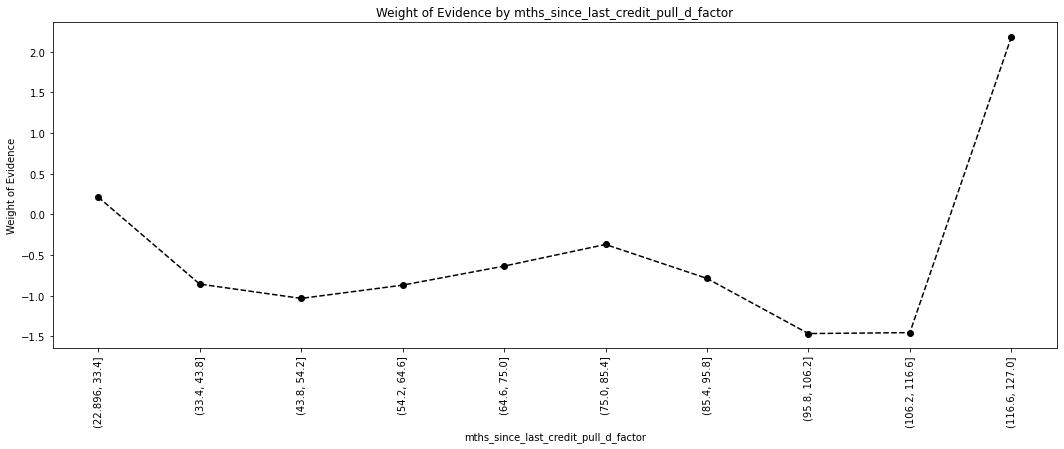

In [116]:
plot_by_woe(df_temp, 90)

In [117]:
loan_data['mths_since_last_credit_pull_d:<33.4'] = np.where((loan_data['mths_since_last_credit_pull_d'] <= 33.4), 1, 0)
loan_data['mths_since_last_credit_pull_d:33.4-85.4'] = np.where((loan_data['mths_since_last_credit_pull_d'] >33.4) & (loan_data['mths_since_last_credit_pull_d'] <= 85.4), 1, 0)
loan_data['mths_since_last_credit_pull_d:85.4-106.2'] = np.where((loan_data['mths_since_last_credit_pull_d'] >85.4 ) & (loan_data['mths_since_last_credit_pull_d'] <= 106.2), 1, 0)
loan_data['mths_since_last_credit_pull_d:>106.2'] = np.where((loan_data['mths_since_last_credit_pull_d'] >106.2 ), 1, 0)

In [118]:
loan_data['total_rev_hi_lim'].describe()

count    4.662850e+05
mean     2.757367e+04
std      3.509068e+04
min      0.000000e+00
25%      1.160000e+04
50%      2.010000e+04
75%      3.460000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64

In [119]:
loan_data['total_rev_hi_lim_factor'] = pd.cut(loan_data['total_rev_hi_lim'],100)
loan_data['total_rev_hi_lim_factor'].unique()

[(-9999.999, 99999.99], (99999.99, 199999.98], (299999.97, 399999.96], (199999.98, 299999.97], (399999.96, 499999.95], ..., (899999.91, 999999.9], (1499999.85, 1599999.84], (799999.92, 899999.91], (1099999.89, 1199999.88], (1299999.87, 1399999.86]]
Length: 17
Categories (100, interval[float64, right]): [(-9999.999, 99999.99] < (99999.99, 199999.98] < (199999.98, 299999.97] < (299999.97, 399999.96] ... (9599999.04, 9699999.03] < (9699999.03, 9799999.02] < (9799999.02, 9899999.01] < (9899999.01, 9999999.0]]

In [120]:
df_temp=woe_continuous(loan_data,'total_rev_hi_lim_factor','good_bad')
df_temp

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,"(-9999.999, 99999.99]",456557,0.977788,0.990131,406092.0,50465.0,-0.012544,-0.012343,0.000155,inf
1,"(99999.99, 199999.98]",8313,0.018971,0.008515,7879.0,434.0,0.801068,0.010456,0.008376,inf
2,"(199999.98, 299999.97]",993,0.002273,0.000961,944.0,49.0,0.860462,0.001312,0.001129,inf
3,"(299999.97, 399999.96]",271,0.000619,0.000275,257.0,14.0,0.812175,0.000344,0.000279,inf
4,"(399999.96, 499999.95]",77,0.000181,0.000039,75.0,2.0,1.526497,0.000141,0.000216,inf
...,...,...,...,...,...,...,...,...,...,...
95,"(9499999.05, 9599999.04]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
96,"(9599999.04, 9699999.03]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
97,"(9699999.03, 9799999.02]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
98,"(9799999.02, 9899999.01]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


In [121]:
temp= loan_data[loan_data['total_rev_hi_lim'] <= 100000]

In [122]:
temp['total_rev_hi_lim_factor'] = pd.cut(temp['total_rev_hi_lim'], 10)
df_temp=woe_continuous(temp,'total_rev_hi_lim_factor','good_bad')
df_temp

C:\Users\Admin\AppData\Local\Temp/ipykernel_4116/1101561602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['total_rev_hi_lim_factor'] = pd.cut(temp['total_rev_hi_lim'], 10)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,"(-100.0, 10000.0]",96563,0.207425,0.244184,84240.0,12323.0,-0.163151,-0.036759,0.005997,0.033427
1,"(10000.0, 20000.0]",136191,0.294838,0.325982,119740.0,16451.0,-0.100417,-0.031144,0.003127,0.033427
2,"(20000.0, 30000.0]",89827,0.196655,0.197380,79866.0,9961.0,-0.003681,-0.000725,0.000003,0.033427
3,"(30000.0, 40000.0]",54155,0.119961,0.107716,48719.0,5436.0,0.107672,0.012245,0.001318,0.033427
4,"(40000.0, 50000.0]",32641,0.073426,0.055899,29820.0,2821.0,0.272734,0.017527,0.004780,0.033427
5,"(50000.0, 60000.0]",19510,0.044203,0.030872,17952.0,1558.0,0.358945,0.013331,0.004785,0.033427
6,"(60000.0, 70000.0]",12033,0.027524,0.016942,11178.0,855.0,0.485248,0.010582,0.005135,0.033427
7,"(70000.0, 80000.0]",7473,0.017096,0.010502,6943.0,530.0,0.487258,0.006594,0.003213,0.033427
8,"(80000.0, 90000.0]",4981,0.011403,0.006935,4631.0,350.0,0.497241,0.004468,0.002221,0.033427
9,"(90000.0, 100000.0]",3214,0.007468,0.003587,3033.0,181.0,0.733457,0.003882,0.002847,0.033427


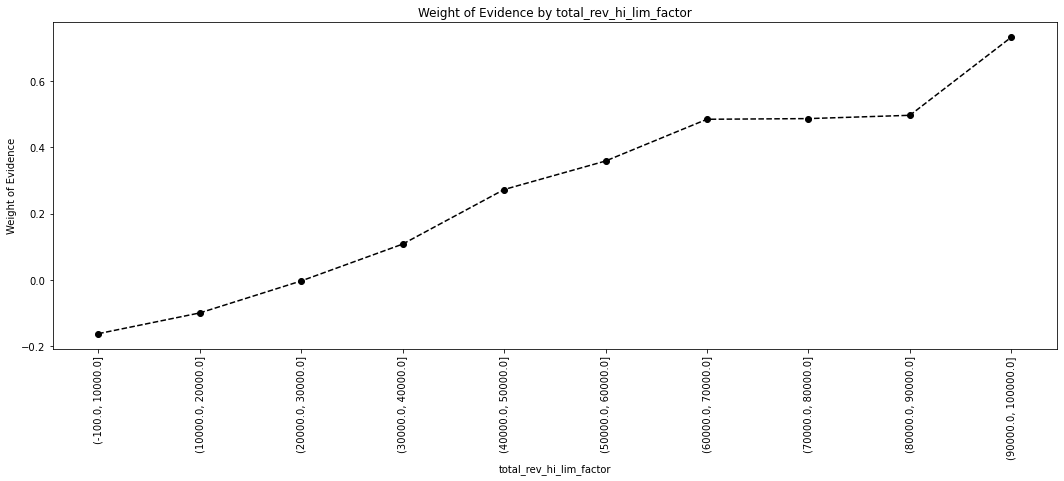

In [123]:
plot_by_woe(df_temp, 90)

In [124]:
loan_data['total_rev_hi_lim:<=10K'] = np.where((loan_data['total_rev_hi_lim'] <= 10000), 1, 0)
loan_data['total_rev_hi_lim:10K-20K'] = np.where((loan_data['total_rev_hi_lim'] > 10000) & (loan_data['total_rev_hi_lim'] <= 20000), 1, 0)
loan_data['total_rev_hi_lim:20K-30K'] = np.where((loan_data['total_rev_hi_lim'] > 20000) & (loan_data['total_rev_hi_lim'] <= 30000), 1, 0)
loan_data['total_rev_hi_lim:30K-60K'] = np.where((loan_data['total_rev_hi_lim'] > 30000) & (loan_data['total_rev_hi_lim'] <= 60000), 1, 0)
loan_data['total_rev_hi_lim:60K-100K'] = np.where((loan_data['total_rev_hi_lim'] > 60000) & (loan_data['total_rev_hi_lim'] <= 100000), 1, 0)
loan_data['total_rev_hi_lim:>100K'] = np.where((loan_data['total_rev_hi_lim'] > 100000), 1, 0)

In [125]:
loan_data['installment_factor'] = pd.cut(loan_data['installment'],10)
loan_data['installment_factor'].unique()

[(155.102, 294.534], (14.276, 155.102], (294.534, 433.966], (433.966, 573.398], (573.398, 712.83], (991.694, 1131.126], (712.83, 852.262], (1131.126, 1270.558], (852.262, 991.694], (1270.558, 1409.99]]
Categories (10, interval[float64, right]): [(14.276, 155.102] < (155.102, 294.534] < (294.534, 433.966] < (433.966, 573.398] ... (852.262, 991.694] < (991.694, 1131.126] < (1131.126, 1270.558] < (1270.558, 1409.99]]

In [126]:
df_temp=woe_continuous(loan_data,'installment_factor','good_bad')
df_temp

,installment_factor,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,"(14.276, 155.102]",41029,0.088352,0.085053,36694.0,4335.0,0.038048,0.003298,1.254969e-04,0.005394
1,"(155.102, 294.534]",109706,0.237253,0.219177,98535.0,11171.0,0.079247,0.018076,1.432443e-03,0.005394
2,"(294.534, 433.966]",120483,0.258265,0.259398,107262.0,13221.0,-0.004376,-0.001133,4.956762e-06,0.005394
3,"(433.966, 573.398]",81533,0.173427,0.186509,72027.0,9506.0,-0.072726,-0.013083,9.514495e-04,0.005394
4,"(573.398, 712.83]",53199,0.114115,0.113895,47394.0,5805.0,0.001932,0.000220,4.255046e-07,0.005394
5,"(712.83, 852.262]",28492,0.061180,0.060489,25409.0,3083.0,0.011356,0.000691,7.845305e-06,0.005394
6,"(852.262, 991.694]",17308,0.036389,0.043066,15113.0,2195.0,-0.168471,-0.006677,1.124908e-03,0.005394
7,"(991.694, 1131.126]",7072,0.015097,0.015735,6270.0,802.0,-0.041421,-0.000638,2.644576e-05,0.005394
8,"(1131.126, 1270.558]",6425,0.013932,0.012537,5786.0,639.0,0.105448,0.001394,1.470206e-04,0.005394
9,"(1270.558, 1409.99]",1038,0.001991,0.004140,827.0,211.0,-0.731898,-0.002149,1.572557e-03,0.005394


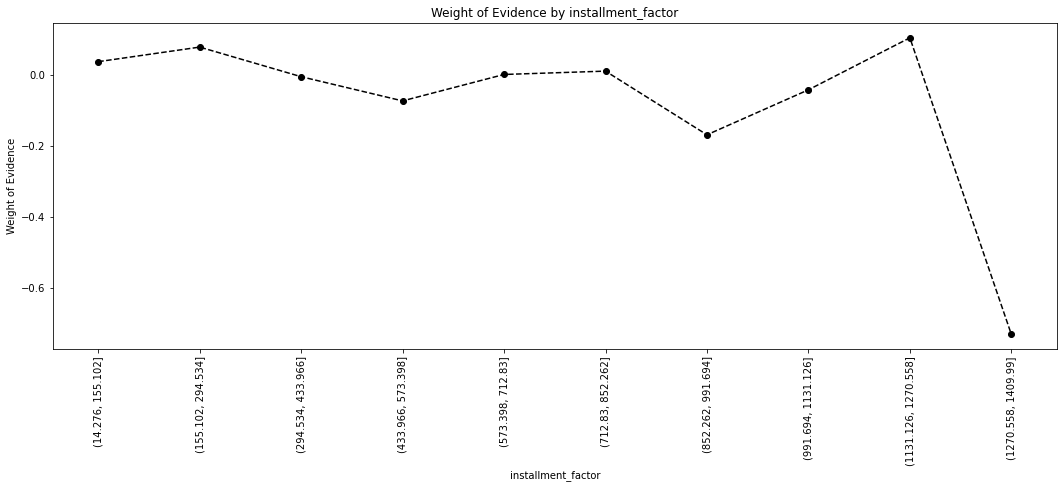

In [127]:
plot_by_woe(df_temp, 90)

In [128]:
loan_data['installment:<294.534'] = np.where((loan_data['installment'] <= 294.534), 1, 0)
loan_data['installment:294.534-573.398'] = np.where((loan_data['installment'] >294.534) & (loan_data['installment'] <= 573.398), 1, 0)
loan_data['installment:573.398-991.694'] = np.where((loan_data['installment'] >573.398 ) & (loan_data['installment'] <= 991.694), 1, 0)
loan_data['installment:991.694-1270.558'] = np.where((loan_data['installment'] > 991.694) & (loan_data['installment'] <=1270.558 ), 1, 0)
loan_data['installment:>1270.558'] = np.where((loan_data['installment'] >1270.558), 1, 0)

In [129]:
loan_data['annual_inc_factor'] = pd.cut(loan_data['annual_inc'], 100)


In [130]:
df_temp=woe_continuous(loan_data,'annual_inc_factor','good_bad')
df_temp

,annual_inc_factor,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,"(-5602.104, 76877.04]",306443,0.647361,0.737384,268860.0,37583.0,-0.130205,-0.090023,0.011721,inf
1,"(76877.04, 151858.08]",139400,0.306980,0.233598,127494.0,11906.0,0.273183,0.073382,0.020047,inf
2,"(151858.08, 226839.12]",14866,0.033177,0.021327,13779.0,1087.0,0.441880,0.011850,0.005236,inf
3,"(226839.12, 301820.16]",3559,0.007946,0.005082,3300.0,259.0,0.447006,0.002864,0.001280,inf
4,"(301820.16, 376801.2]",867,0.001941,0.001197,806.0,61.0,0.483366,0.000744,0.000360,inf
...,...,...,...,...,...,...,...,...,...,...
95,"(7125094.8, 7200075.84]",1,0.000002,0.000000,1.0,0.0,inf,0.000002,inf,inf
96,"(7200075.84, 7275056.88]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
97,"(7275056.88, 7350037.92]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
98,"(7350037.92, 7425018.96]",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


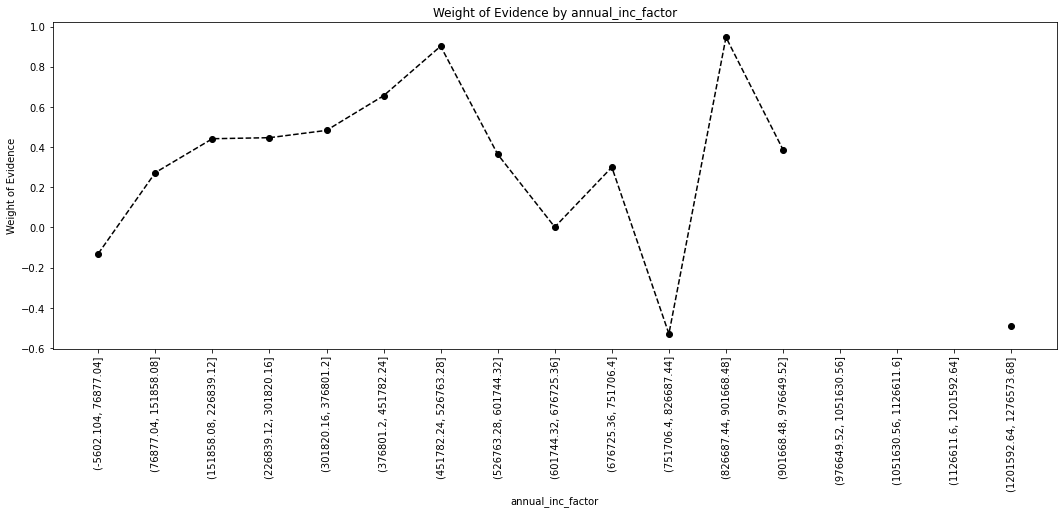

In [131]:
plot_by_woe(df_temp, 90)

In [132]:
temp= loan_data[loan_data['annual_inc'] <= 150000]

In [133]:
temp['annual_inc_factor'] = pd.cut(temp['annual_inc'], 50)

C:\Users\Admin\AppData\Local\Temp/ipykernel_4116/25296112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['annual_inc_factor'] = pd.cut(temp['annual_inc'], 50)


In [134]:
df_temp=woe_continuous(temp,'annual_inc_factor','good_bad')
df_temp

,annual_inc_factor,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,"(1747.896, 4858.08]",22,0.000043,0.000101,17.0,5.0,-0.856696,-0.000058,0.000050,0.050614
1,"(4858.08, 7820.16]",53,0.000111,0.000182,44.0,9.0,-0.493507,-0.000071,0.000035,0.050614
2,"(7820.16, 10782.24]",433,0.000914,0.001435,362.0,71.0,-0.451508,-0.000521,0.000235,0.050614
3,"(10782.24, 13744.32]",875,0.001825,0.003072,723.0,152.0,-0.520943,-0.001247,0.000650,0.050614
4,"(13744.32, 16706.4]",1736,0.003693,0.005518,1463.0,273.0,-0.401699,-0.001825,0.000733,0.050614
5,"(16706.4, 19668.48]",2352,0.005013,0.007398,1986.0,366.0,-0.389227,-0.002385,0.000928,0.050614
6,"(19668.48, 22630.56]",4462,0.009505,0.014068,3766.0,696.0,-0.392053,-0.004563,0.001789,0.050614
7,"(22630.56, 25592.64]",8010,0.017297,0.023386,6853.0,1157.0,-0.301616,-0.006089,0.001837,0.050614
8,"(25592.64, 28554.72]",7158,0.015358,0.021688,6085.0,1073.0,-0.345104,-0.006330,0.002184,0.050614
9,"(28554.72, 31516.8]",12916,0.028059,0.036363,11117.0,1799.0,-0.259227,-0.008303,0.002152,0.050614


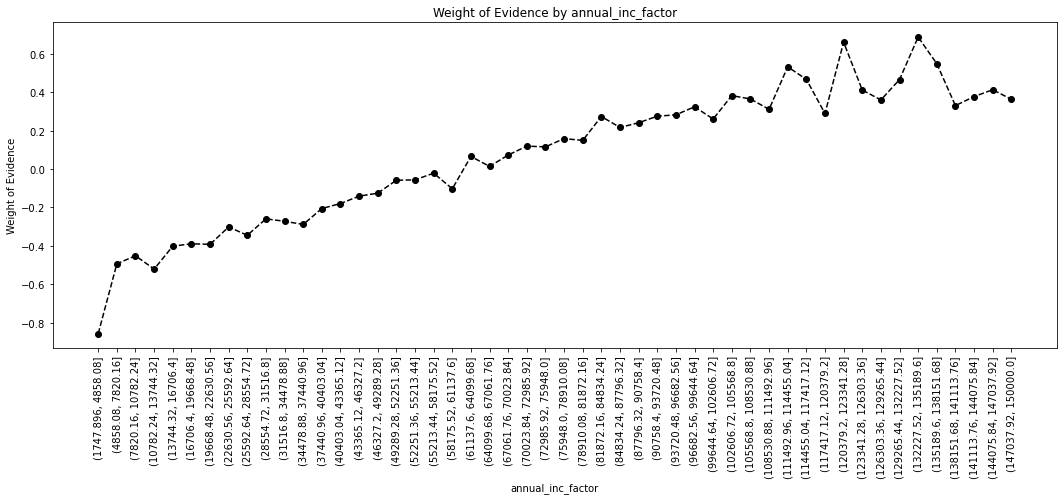

In [135]:
plot_by_woe(df_temp, 90)

In [136]:
loan_data['annual_inc:<20K'] = np.where((loan_data['annual_inc'] <= 20000), 1, 0)
loan_data['annual_inc:20K-30K'] = np.where((loan_data['annual_inc'] > 20000) & (loan_data['annual_inc'] <= 30000), 1, 0)
loan_data['annual_inc:30K-40K'] = np.where((loan_data['annual_inc'] > 30000) & (loan_data['annual_inc'] <= 40000), 1, 0)
loan_data['annual_inc:40K-50K'] = np.where((loan_data['annual_inc'] > 40000) & (loan_data['annual_inc'] <= 50000), 1, 0)
loan_data['annual_inc:50K-60K'] = np.where((loan_data['annual_inc'] > 50000) & (loan_data['annual_inc'] <= 60000), 1, 0)
loan_data['annual_inc:60K-70K'] = np.where((loan_data['annual_inc'] > 60000) & (loan_data['annual_inc'] <= 70000), 1, 0)
loan_data['annual_inc:70K-80K'] = np.where((loan_data['annual_inc'] > 70000) & (loan_data['annual_inc'] <= 80000), 1, 0)
loan_data['annual_inc:80K-90K'] = np.where((loan_data['annual_inc'] > 80000) & (loan_data['annual_inc'] <= 90000), 1, 0)
loan_data['annual_inc:90K-100K'] = np.where((loan_data['annual_inc'] > 90000) & (loan_data['annual_inc'] <= 100000), 1, 0)
loan_data['annual_inc:100K-120K'] = np.where((loan_data['annual_inc'] > 100000) & (loan_data['annual_inc'] <= 150000), 1, 0)
loan_data['annual_inc:120K-150K'] = np.where((loan_data['annual_inc'] > 120000) & (loan_data['annual_inc'] <= 140000), 1, 0)
loan_data['annual_inc:>150K'] = np.where((loan_data['annual_inc'] > 150000), 1, 0)

In [137]:
loan_data['mths_since_last_delinq_factor'] = pd.cut(loan_data['mths_since_last_delinq'],50)
loan_data['mths_since_last_delinq_factor'].unique()

[NaN, (33.84, 37.6], (37.6, 41.36], (60.16, 63.92], (7.52, 11.28], ..., (150.4, 154.16], (169.2, 172.96], (176.72, 180.48], (184.24, 188.0], (157.92, 161.68]]
Length: 47
Categories (50, interval[float64, right]): [(-0.188, 3.76] < (3.76, 7.52] < (7.52, 11.28] < (11.28, 15.04] ... (172.96, 176.72] < (176.72, 180.48] < (180.48, 184.24] < (184.24, 188.0]]

In [138]:
df_temp=woe_continuous(loan_data,'mths_since_last_delinq_factor','good_bad')
df_temp

,mths_since_last_delinq_factor,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,"(-0.188, 3.76]",6625,0.029951,0.036720,5770.0,855.0,-0.203783,-0.006770,1.379570e-03,inf
1,"(3.76, 7.52]",13834,0.063680,0.067256,12268.0,1566.0,-0.054639,-0.003576,1.954019e-04,inf
2,"(7.52, 11.28]",16690,0.077306,0.077177,14893.0,1797.0,0.001664,0.000129,2.138883e-07,inf
3,"(11.28, 15.04]",16547,0.076278,0.079540,14695.0,1852.0,-0.041867,-0.003261,1.365455e-04,inf
4,"(15.04, 18.8]",11645,0.054088,0.052611,10420.0,1225.0,0.027678,0.001476,4.086559e-05,inf
5,"(18.8, 22.56]",14579,0.067579,0.066999,13019.0,1560.0,0.008615,0.000580,4.994438e-06,inf
6,"(22.56, 26.32]",13603,0.063270,0.060728,12189.0,1414.0,0.041003,0.002542,1.042199e-04,inf
7,"(26.32, 30.08]",13221,0.061443,0.059440,11837.0,1384.0,0.033144,0.002003,6.638928e-05,inf
8,"(30.08, 33.84]",9442,0.044085,0.040758,8493.0,949.0,0.078480,0.003328,2.611447e-04,inf
9,"(33.84, 37.6]",12168,0.056761,0.052955,10935.0,1233.0,0.069410,0.003806,2.641838e-04,inf


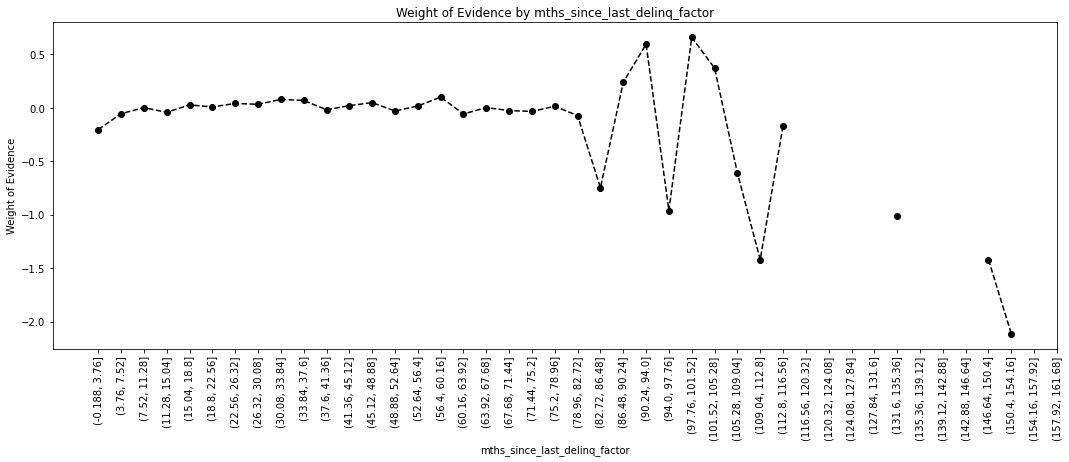

In [139]:
plot_by_woe(df_temp, 90)

In [140]:
loan_data['mths_since_last_delinq:Missing'] = np.where((loan_data['mths_since_last_delinq'].isnull()), 1, 0)
loan_data['mths_since_last_delinq:0-3'] = np.where((loan_data['mths_since_last_delinq'] >= 0) & (loan_data['mths_since_last_delinq'] <= 3), 1, 0)
loan_data['mths_since_last_delinq:4-30'] = np.where((loan_data['mths_since_last_delinq'] >= 4) & (loan_data['mths_since_last_delinq'] <= 30), 1, 0)
loan_data['mths_since_last_delinq:31-56'] = np.where((loan_data['mths_since_last_delinq'] >= 31) & (loan_data['mths_since_last_delinq'] <= 56), 1, 0)
loan_data['mths_since_last_delinq:>=57'] = np.where((loan_data['mths_since_last_delinq'] >= 57), 1, 0)

In [141]:
loan_data['dti_factor'] = pd.cut(loan_data['dti'], 50)
loan_data['dti_factor'].unique()

[(27.193, 27.993], (0.8, 1.6], (7.998, 8.798], (19.995, 20.795], (17.596, 18.395], ..., (38.39, 39.19], (39.19, 39.99], (36.791, 37.591], (37.591, 38.39], (35.991, 36.791]]
Length: 50
Categories (50, interval[float64, right]): [(-0.04, 0.8] < (0.8, 1.6] < (1.6, 2.399] < (2.399, 3.199] ... (36.791, 37.591] < (37.591, 38.39] < (38.39, 39.19] < (39.19, 39.99]]

In [142]:
df_temp=woe_continuous(loan_data,'dti_factor','good_bad')
df_temp

,dti_factor,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,"(-0.04, 0.8]",1924,0.004153,0.003904,1725.0,199.0,0.061833,0.000249,1.539919e-05,0.027154
1,"(0.8, 1.6]",2443,0.005278,0.004925,2192.0,251.0,0.069273,0.000353,2.446969e-05,0.027154
2,"(1.6, 2.399]",3148,0.006889,0.005631,2861.0,287.0,0.201600,0.001258,2.535585e-04,0.027154
3,"(2.399, 3.199]",4042,0.008861,0.007102,3680.0,362.0,0.221180,0.001758,3.888795e-04,0.027154
4,"(3.199, 3.999]",5171,0.011326,0.009163,4704.0,467.0,0.211995,0.002164,4.586888e-04,0.027154
5,"(3.999, 4.799]",6297,0.013893,0.010340,5770.0,527.0,0.295383,0.003553,1.049548e-03,0.027154
6,"(4.799, 5.599]",7516,0.016503,0.012989,6854.0,662.0,0.239478,0.003515,8.416492e-04,0.027154
7,"(5.599, 6.398]",8511,0.018709,0.014539,7770.0,741.0,0.252181,0.004170,1.051610e-03,0.027154
8,"(6.398, 7.198]",9664,0.021285,0.016167,8840.0,824.0,0.275028,0.005118,1.407574e-03,0.027154
9,"(7.198, 7.998]",10974,0.024155,0.018482,10032.0,942.0,0.267686,0.005673,1.518544e-03,0.027154


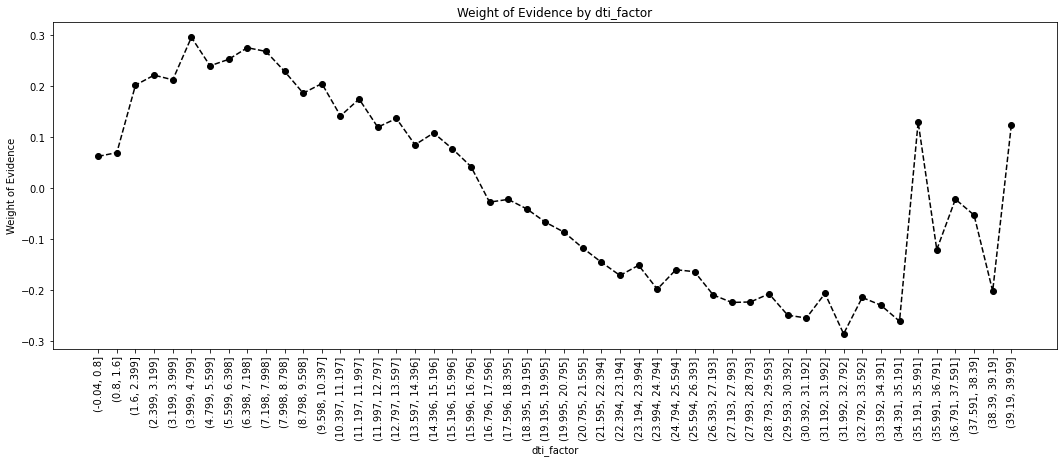

In [143]:
plot_by_woe(df_temp, 90)

In [144]:
loan_data['dti:<=1.4'] = np.where((loan_data['dti'] <= 1.4), 1, 0)
loan_data['dti:1.4-3.5'] = np.where((loan_data['dti'] > 1.4) & (loan_data['dti'] <= 3.5), 1, 0)
loan_data['dti:3.5-7.7'] = np.where((loan_data['dti'] > 3.5) & (loan_data['dti'] <= 7.7), 1, 0)
loan_data['dti:7.7-10.5'] = np.where((loan_data['dti'] > 7.7) & (loan_data['dti'] <= 10.5), 1, 0)
loan_data['dti:10.5-16.1'] = np.where((loan_data['dti'] > 10.5) & (loan_data['dti'] <= 16.1), 1, 0)
loan_data['dti:16.1-20.3'] = np.where((loan_data['dti'] > 16.1) & (loan_data['dti'] <= 20.3), 1, 0)
loan_data['dti:20.3-21.7'] = np.where((loan_data['dti'] > 20.3) & (loan_data['dti'] <= 21.7), 1, 0)
loan_data['dti:21.7-22.4'] = np.where((loan_data['dti'] > 21.7) & (loan_data['dti'] <= 22.4), 1, 0)
loan_data['dti:22.4-35'] = np.where((loan_data['dti'] > 22.4) & (loan_data['dti'] <= 35), 1, 0)
loan_data['dti:>35'] = np.where((loan_data['dti'] > 35), 1, 0)

In [145]:
loan_data['mths_since_last_record_factor'] = pd.cut(loan_data['mths_since_last_record'], 10)
loan_data['mths_since_last_record_factor'].unique()

[NaN, (103.2, 116.1], (90.3, 103.2], (25.8, 38.7], (51.6, 64.5], ..., (116.1, 129.0], (38.7, 51.6], (64.5, 77.4], (12.9, 25.8], (-0.129, 12.9]]
Length: 11
Categories (10, interval[float64, right]): [(-0.129, 12.9] < (12.9, 25.8] < (25.8, 38.7] < (38.7, 51.6] ... (77.4, 90.3] < (90.3, 103.2] < (103.2, 116.1] < (116.1, 129.0]]

In [146]:
df_temp=woe_continuous(loan_data,'mths_since_last_record_factor','good_bad')
df_temp

,mths_since_last_record_factor,n_obs,prop_good,prop_bad,n_good,n_bad,WoE,prop_good - prop_bad,WoE*(prop_good - prop_bad),IV
0,"(-0.129, 12.9]",2200,0.032134,0.060265,1799.0,401.0,-0.628823,-0.028130,1.768899e-02,0.058122
1,"(12.9, 25.8]",2066,0.033617,0.027653,1882.0,184.0,0.195307,0.005964,1.164850e-03,0.058122
2,"(25.8, 38.7]",3963,0.064894,0.049594,3633.0,330.0,0.268874,0.015299,4.113581e-03,0.058122
3,"(38.7, 51.6]",6721,0.110657,0.079050,6195.0,526.0,0.336349,0.031606,1.063078e-02,0.058122
4,"(51.6, 64.5]",8950,0.146060,0.116171,8177.0,773.0,0.228954,0.029889,6.843169e-03,0.058122
5,"(64.5, 77.4]",8171,0.132824,0.110460,7436.0,735.0,0.184370,0.022364,4.123214e-03,0.058122
6,"(77.4, 90.3]",7077,0.111192,0.128043,6225.0,852.0,-0.141106,-0.016851,2.377741e-03,0.058122
7,"(90.3, 103.2]",9429,0.146524,0.184250,8203.0,1226.0,-0.229105,-0.037726,8.643218e-03,0.058122
8,"(103.2, 116.1]",12047,0.189929,0.212504,10633.0,1414.0,-0.112308,-0.022574,2.535295e-03,0.058122
9,"(116.1, 129.0]",2014,0.032170,0.032011,1801.0,213.0,0.004957,0.000159,7.886520e-07,0.058122


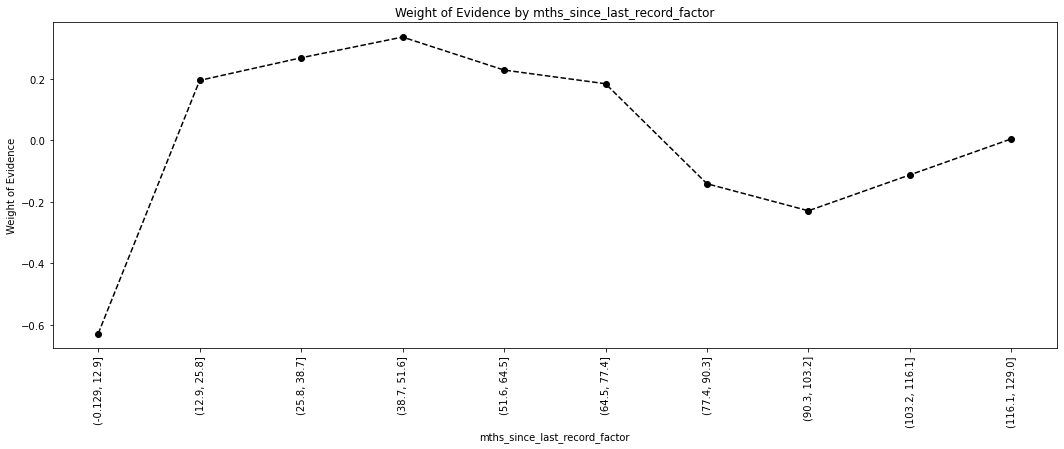

In [147]:
plot_by_woe(df_temp, 90)

In [148]:
loan_data['mths_since_last_record:0-13'] = np.where((loan_data['mths_since_last_record'] >= 0) & (loan_data['mths_since_last_record'] <=13), 1, 0)
loan_data['mths_since_last_record:13-53'] = np.where((loan_data['mths_since_last_record'] >13) & (loan_data['mths_since_last_record'] <= 53), 1, 0)
loan_data['mths_since_last_record:53-79'] = np.where((loan_data['mths_since_last_record'] >53) & (loan_data['mths_since_last_record'] <= 79), 1, 0)
loan_data['mths_since_last_record:79-103'] = np.where((loan_data['mths_since_last_record'] >79) & (loan_data['mths_since_last_record'] <=104), 1, 0)
loan_data['mths_since_last_record:>=104'] = np.where((loan_data['mths_since_last_record'] >104), 1, 0)

In [149]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'tot

In [150]:
X_data=loan_data.loc[:,[
       'grade:A', 'grade:B',
       'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G',
       'home_ownership:MORTGAGE', 
       'home_ownership:OWN',
       'home_ownership:RENT_OTHER_NONE_ANY',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified',
       'purpose:energy_moving_house_other',
       'purpose:home_purchase_car__card',
       'purpose:medical_wedding_vacation_debt',
       'purpose:small_business_educational',
       'addr_state:AZ_MI_UT_TN_AR_PA', 'addr_state:HI_FL_AL_NY',
       'addr_state:LA_NM_OK_NC', 'addr_state:MA_IN_GA_WA_WI_OR',
       'addr_state:MO_MD_NJ_VA_CA_MD', 'addr_state:NE_IA_NV',
       'addr_state:RI_OH_KY_DE_MN_SD', 'addr_state:TX_IL_CT_MT_CO_SC_KS',
       'addr_state:VT_AK_MS_ID_NH_WV', 'addr_state:WY_DC_ME',
       'initial_list_status:f', 'initial_list_status:w', 
       'term_int:36','term_int:60',
       'emp_length:0', 'emp_length:1', 'emp_length:2-4',
       'emp_length:5-6', 'emp_length:7-9', 'emp_length:10',
       'delinq_2yrs:0', 'delinq_2yrs:1-3', 'delinq_2yrs:>=4',
       'inq_last_6mths:0', 'inq_last_6mths:1-2', 'inq_last_6mths:3-6',
       'inq_last_6mths:>6',
       'open_acc:0', 'open_acc:1-3', 'open_acc:4-22',
       'open_acc:23-32', 'open_acc:33-40', 'open_acc:>=41',
       'pub_rec:0-2','pub_rec:3-4', 'pub_rec:>=5', 
       'total_acc:<=16','total_acc:17-93', 'total_acc:>93',
       'acc_now_delinq:0','acc_now_delinq:>=1',
       'mths_since_issue_d:<=45', 'mths_since_issue_d:45-63',
       'mths_since_issue_d:63-99', 'mths_since_issue_d:>99',
       'int_rate:<9.548', 'int_rate:9.548-12.025',
       'int_rate:12.025-15.74', 'int_rate:15.74-20.281',
       'int_rate:>20.281',
       'funded_amnt:<7400','funded_amnt:7400-14300.0', 
       'funded_amnt:14300.0-28100.0','funded_amnt:>28100.0', 
       'mths_since_earliest_cr_line:<117.4',
       'mths_since_earliest_cr_line:117.4-469.6',
       'mths_since_earliest_cr_line:293.5-469.6',
       'mths_since_earliest_cr_line:>469.6',
       'mths_since_last_credit_pull_d:<33.4',
       'mths_since_last_credit_pull_d:33.4-85.4',
       'mths_since_last_credit_pull_d:85.4-106.2',
       'mths_since_last_credit_pull_d:>106.2', 
       'total_rev_hi_lim:<=10K', 'total_rev_hi_lim:10K-20K',
       'total_rev_hi_lim:20K-30K', 'total_rev_hi_lim:30K-60K',
       'total_rev_hi_lim:60K-100K', 'total_rev_hi_lim:>100K',
       'installment:<294.534','installment:294.534-573.398', 'installment:573.398-991.694',
       'installment:991.694-1270.558', 'installment:>1270.558',
       'annual_inc:<20K', 'annual_inc:20K-30K',
       'annual_inc:30K-40K', 'annual_inc:40K-50K', 'annual_inc:50K-60K',
       'annual_inc:60K-70K', 'annual_inc:70K-80K', 'annual_inc:80K-90K',
       'annual_inc:90K-100K', 'annual_inc:100K-120K',
       'annual_inc:120K-150K', 'annual_inc:>150K',
       'mths_since_last_delinq:Missing',
       'mths_since_last_delinq:0-3', 'mths_since_last_delinq:4-30',
       'mths_since_last_delinq:31-56', 'mths_since_last_delinq:>=57',
       'dti:<=1.4', 'dti:1.4-3.5', 'dti:3.5-7.7',
       'dti:7.7-10.5', 'dti:10.5-16.1', 'dti:16.1-20.3', 'dti:20.3-21.7',
       'dti:21.7-22.4', 'dti:22.4-35', 'dti:>35',
       'mths_since_last_record:0-13',
       'mths_since_last_record:13-53', 'mths_since_last_record:53-79',
       'mths_since_last_record:79-103', 'mths_since_last_record:>=104']]

In [151]:
ref_categories = ['grade:G',
                 'home_ownership:RENT_OTHER_NONE_ANY',
                 'verification_status:Verified',
                 'purpose:small_business_educational',
                 'addr_state:NE_IA_NV',
                 'initial_list_status:f',
                 'term_int:60',
                 'emp_length:0',
                 'delinq_2yrs:>=4',
                 'inq_last_6mths:>6',
                 'open_acc:0',
                 'pub_rec:0-2',
                 'total_acc:<=16',
                 'acc_now_delinq:0',
                 'mths_since_issue_d:>99',
                 'int_rate:>20.281',
                 'funded_amnt:>28100.0',
                 'mths_since_earliest_cr_line:<117.4',
                 'mths_since_last_credit_pull_d:<33.4',
                 'total_rev_hi_lim:<=10K',
                 'installment:>1270.558',
                 'annual_inc:<20K',
                 'mths_since_last_delinq:0-3',
                 'dti:>35',
                 'mths_since_last_record:0-13',
                 ]

In [152]:
X_data_no_ref_categories=X_data.drop(ref_categories,axis=1)

In [153]:
X_train,X_test,y_train,y_test=train_test_split(X_data_no_ref_categories, loan_data['good_bad'], test_size = 0.2, random_state = 42)

In [154]:
X_train.shape

(373028, 97)

In [155]:
y_train.shape

(373028,)

In [156]:
X_test.shape

(93257, 97)

In [157]:
y_test.shape

(93257,)

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [159]:
reg = LogisticRegression(solver='lbfgs', max_iter=10000)

In [160]:
pd.options.display.max_rows = None

In [161]:
reg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [162]:
reg.intercept_

array([-1.50062565])

In [163]:
reg.coef_

array([[ 0.92993296,  0.7103766 ,  0.57138122,  0.43258627,  0.28119545,
         0.1083836 ,  0.12992035,  0.12668975,  0.03314634, -0.02026196,
         0.37654478,  0.47547311,  0.40001395,  0.13140112,  0.05325306,
         0.09783408,  0.18477971,  0.08760418,  0.15578467,  0.28399435,
         0.42728049,  0.61793366,  0.04171041,  0.06280411,  0.10313257,
         0.1246067 ,  0.07933398,  0.04926276,  0.11255814,  0.09471086,
         0.06686037,  0.7252772 ,  0.57724213,  0.36258928,  0.38378027,
         0.27115694,  0.25216845,  0.07617251,  0.08344898,  0.0979736 ,
         0.07693785, -0.06984086,  0.15676225,  0.24513382,  0.21180963,
        -0.08401841, -0.14016525,  1.02487947,  0.6617164 ,  0.3488895 ,
         0.11007743,  0.19587868,  0.08246882,  0.02049038,  0.05773586,
         0.04617216,  0.05712008, -1.01768432, -1.19014759, -1.03760792,
         0.05195245,  0.08574593,  0.14355487,  0.1996733 ,  0.35730937,
         0.4415258 ,  0.34028337,  0.26975279,  0.1

In [164]:
feature_name = X_train.columns.values

In [165]:
pd.options.display.max_rows = None
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.500626
1,grade:A,0.929933
2,grade:B,0.710377
3,grade:C,0.571381
4,grade:D,0.432586
5,grade:E,0.281195
6,grade:F,0.108384
7,home_ownership:MORTGAGE,0.129920
8,home_ownership:OWN,0.126690
9,verification_status:Not Verified,0.033146


# Build a Logistic Regression Model with P-Values

In [166]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [167]:
reg = LogisticRegression_with_p_values()

In [168]:
reg.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [169]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.963135
1,grade:A,0.954347
2,grade:B,0.735467
3,grade:C,0.593371
4,grade:D,0.454531
5,grade:E,0.299055
6,grade:F,0.124170
7,home_ownership:MORTGAGE,0.130702
8,home_ownership:OWN,0.125423
9,verification_status:Not Verified,0.031678


In [170]:
p_values = reg.p_values

In [171]:
p_values = np.append(np.nan, np.array(p_values))

In [172]:
summary_table['p_values'] = p_values

In [173]:
summary_table.round(3)
# drop Feature name have p_values >0.05 (pub_rec, open_acc,total_acc)

,Feature name,Coefficients,p_values
0,Intercept,-0.963,NaN
1,grade:A,0.954,0.000
2,grade:B,0.735,0.000
3,grade:C,0.593,0.000
4,grade:D,0.455,0.000
5,grade:E,0.299,0.000
6,grade:F,0.124,0.014
7,home_ownership:MORTGAGE,0.131,0.000
8,home_ownership:OWN,0.125,0.000
9,verification_status:Not Verified,0.032,0.037


In [174]:
X_data=loan_data.loc[:,[
       'grade:A', 'grade:B',
       'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G',
       'home_ownership:MORTGAGE', 
       'home_ownership:OWN',
       'home_ownership:RENT_OTHER_NONE_ANY',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified',
       'purpose:energy_moving_house_other',
       'purpose:home_purchase_car__card',
       'purpose:medical_wedding_vacation_debt',
       'purpose:small_business_educational',
       'addr_state:AZ_MI_UT_TN_AR_PA', 'addr_state:HI_FL_AL_NY',
       'addr_state:LA_NM_OK_NC', 'addr_state:MA_IN_GA_WA_WI_OR',
       'addr_state:MO_MD_NJ_VA_CA_MD', 'addr_state:NE_IA_NV',
       'addr_state:RI_OH_KY_DE_MN_SD', 'addr_state:TX_IL_CT_MT_CO_SC_KS',
       'addr_state:VT_AK_MS_ID_NH_WV', 'addr_state:WY_DC_ME',
       'initial_list_status:f', 'initial_list_status:w', 
       'term_int:36','term_int:60',
       'emp_length:0', 'emp_length:1', 'emp_length:2-4',
       'emp_length:5-6', 'emp_length:7-9', 'emp_length:10',
       'delinq_2yrs:0', 'delinq_2yrs:1-3', 'delinq_2yrs:>=4',
       'inq_last_6mths:0', 'inq_last_6mths:1-2', 'inq_last_6mths:3-6',
       'inq_last_6mths:>6', 
       'acc_now_delinq:0','acc_now_delinq:>=1',
       'mths_since_issue_d:<=45', 'mths_since_issue_d:45-63',
       'mths_since_issue_d:63-99', 'mths_since_issue_d:>99',
       'int_rate:<9.548', 'int_rate:9.548-12.025',
       'int_rate:12.025-15.74', 'int_rate:15.74-20.281',
       'int_rate:>20.281',
       'funded_amnt:<7400','funded_amnt:7400-14300.0', 
       'funded_amnt:14300.0-28100.0','funded_amnt:>28100.0', 
       'mths_since_earliest_cr_line:<117.4',
       'mths_since_earliest_cr_line:117.4-469.6',
       'mths_since_earliest_cr_line:293.5-469.6',
       'mths_since_earliest_cr_line:>469.6',
       'mths_since_last_credit_pull_d:<33.4',
       'mths_since_last_credit_pull_d:33.4-85.4',
       'mths_since_last_credit_pull_d:85.4-106.2',
       'mths_since_last_credit_pull_d:>106.2', 
       'total_rev_hi_lim:<=10K', 'total_rev_hi_lim:10K-20K',
       'total_rev_hi_lim:20K-30K', 'total_rev_hi_lim:30K-60K',
       'total_rev_hi_lim:60K-100K', 'total_rev_hi_lim:>100K',
       'installment:<294.534','installment:294.534-573.398', 'installment:573.398-991.694',
       'installment:991.694-1270.558', 'installment:>1270.558',
       'annual_inc:<20K', 'annual_inc:20K-30K',
       'annual_inc:30K-40K', 'annual_inc:40K-50K', 'annual_inc:50K-60K',
       'annual_inc:60K-70K', 'annual_inc:70K-80K', 'annual_inc:80K-90K',
       'annual_inc:90K-100K', 'annual_inc:100K-120K',
       'annual_inc:120K-150K', 'annual_inc:>150K',
       'mths_since_last_delinq:Missing',
       'mths_since_last_delinq:0-3', 'mths_since_last_delinq:4-30',
       'mths_since_last_delinq:31-56', 'mths_since_last_delinq:>=57',
       'dti:<=1.4', 'dti:1.4-3.5', 'dti:3.5-7.7',
       'dti:7.7-10.5', 'dti:10.5-16.1', 'dti:16.1-20.3', 'dti:20.3-21.7',
       'dti:21.7-22.4', 'dti:22.4-35', 'dti:>35',
       'mths_since_last_record:0-13',
       'mths_since_last_record:13-53', 'mths_since_last_record:53-79',
       'mths_since_last_record:79-103', 'mths_since_last_record:>=104']]

In [175]:
ref_categories = ['grade:G',
                 'home_ownership:RENT_OTHER_NONE_ANY',
                 'verification_status:Source Verified',                 
                 'purpose:small_business_educational',
                 'addr_state:NE_IA_NV',
                 'initial_list_status:f',
                 'term_int:60',
                 'emp_length:0',
                 'delinq_2yrs:>=4',
                 'inq_last_6mths:>6',
                 'acc_now_delinq:0',
                 'mths_since_issue_d:63-99',
                 'int_rate:>20.281',
                 'funded_amnt:>28100.0',
                 'mths_since_earliest_cr_line:<117.4',
                 'mths_since_last_credit_pull_d:85.4-106.2',
                 'total_rev_hi_lim:<=10K',
                 'installment:>1270.558',
                 'annual_inc:20K-30K',
                 'mths_since_last_delinq:0-3',
                 'dti:22.4-35',
                 'mths_since_last_record:79-103'
                 ] 

In [176]:
X_data_no_ref_categories=X_data.drop(ref_categories,axis=1)

In [177]:
X_train,X_test,y_train,y_test=train_test_split(X_data_no_ref_categories, loan_data['good_bad'], test_size = 0.2, random_state = 42)

In [178]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [179]:
feature_name = X_train.columns.values

In [180]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-2.382312
1,grade:A,0.994736
2,grade:B,0.740624
3,grade:C,0.595563
4,grade:D,0.448469
5,grade:E,0.276947
6,grade:F,0.097403
7,home_ownership:MORTGAGE,0.122421
8,home_ownership:OWN,0.124500
9,verification_status:Not Verified,0.055011


In [181]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table.round(3)

,Feature name,Coefficients,p_values
0,Intercept,-2.382,NaN
1,grade:A,0.995,0.000
2,grade:B,0.741,0.000
3,grade:C,0.596,0.000
4,grade:D,0.448,0.000
5,grade:E,0.277,0.000
6,grade:F,0.097,0.053
7,home_ownership:MORTGAGE,0.122,0.000
8,home_ownership:OWN,0.124,0.000
9,verification_status:Not Verified,0.055,0.000


In [182]:
import pickle

In [183]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))

In [184]:
y_pred=reg2.model.predict(X_test)

<AxesSubplot:>

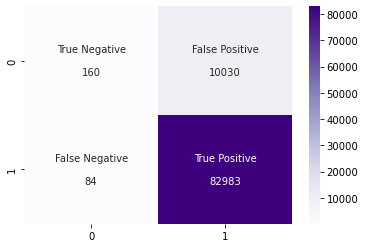

In [185]:
# Confusion Matrix 
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
labels = np.asarray([f'{i}\n\n{j}' for i, j in zip(names, cf_matrix.flatten())])
sns.heatmap(cf_matrix, annot=labels.reshape(2, 2), cmap='Purples', fmt='')

In [186]:
display(metrics.precision_score(y_test, y_pred),
        metrics.recall_score(y_test, y_pred),
        metrics.f1_score(y_test, y_pred))

0.8921656112586412

0.9989887681028568

0.9425601999091322

In [187]:
#fix"ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT"
# and stratify on the distribution of denpendent variable

In [188]:
loan_data['good_bad'].value_counts()

1    415317
0     50968
Name: good_bad, dtype: int64

In [189]:
len(loan_data[loan_data['good_bad']==0])/len(loan_data[loan_data['good_bad']==1])

0.12272071694633256

In [190]:
X_train,X_test,y_train,y_test=train_test_split(X_data_no_ref_categories, loan_data['good_bad'],
                                               stratify=loan_data['good_bad'],
                                               test_size = 0.2, 
                                               random_state = 42)

In [191]:
y_test.value_counts()

1    83063
0    10194
Name: good_bad, dtype: int64

In [192]:
10194/83063

0.12272612354477927

In [193]:
reg2 = LogisticRegression_with_p_values(solver='lbfgs', max_iter=10000) 
reg2.fit(X_train,y_train)
#solver='lbfgs', max_iter=10000: fix"ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT"

In [194]:
y_pred=reg2.model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [195]:
display(metrics.precision_score(y_test, y_pred,average='weighted'),
        metrics.recall_score(y_test, y_pred,average='weighted'),
        metrics.f1_score(y_test, y_pred,average='weighted'))

0.8537722675151189

0.8909250780102298

0.8421182960235921

<AxesSubplot:>

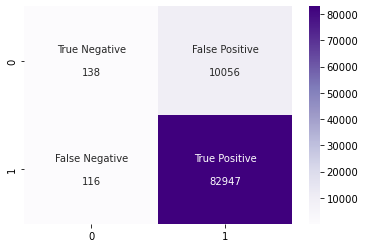

In [196]:
# Confusion Matrix 
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
labels = np.asarray([f'{i}\n\n{j}' for i, j in zip(names, cf_matrix.flatten())])
sns.heatmap(cf_matrix, annot=labels.reshape(2, 2), cmap='Purples', fmt='')

In [197]:
y_pred_prob = reg2.model.predict_proba(X_test)[:,1]
y_pred_prob

array([0.92507601, 0.98378299, 0.90628679, ..., 0.79363614, 0.9218661 ,
       0.87743844])

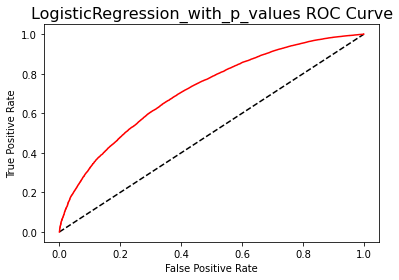

In [198]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='LogisticRegression_with_p_values',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression_with_p_values ROC Curve',fontsize=16)
plt.show();

# Calculating credit score 

In [199]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,verification_status:Source Verified,0,NaN
3,purpose:small_business_educational,0,NaN
4,addr_state:NE_IA_NV,0,NaN
5,initial_list_status:f,0,NaN
6,term_int:60,0,NaN
7,emp_length:0,0,NaN
8,delinq_2yrs:>=4,0,NaN
9,inq_last_6mths:>6,0,NaN


In [200]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-2.382312,NaN
1,1,grade:A,0.994736,1.634167e-28
2,2,grade:B,0.740624,1.623612e-33
3,3,grade:C,0.595563,1.786911e-25
4,4,grade:D,0.448469,1.319121e-16
5,5,grade:E,0.276947,1.009425e-08
6,6,grade:F,0.097403,5.268579e-02
7,7,home_ownership:MORTGAGE,0.122421,2.314469e-22
8,8,home_ownership:OWN,0.124500,8.305281e-10
9,9,verification_status:Not Verified,0.055011,3.117852e-04


In [201]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [202]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-2.382312,NaN,Intercept
1,1,grade:A,0.994736,1.634167e-28,grade
2,2,grade:B,0.740624,1.623612e-33,grade
3,3,grade:C,0.595563,1.786911e-25,grade
4,4,grade:D,0.448469,1.319121e-16,grade
5,5,grade:E,0.276947,1.009425e-08,grade
6,6,grade:F,0.097403,5.268579e-02,grade
7,7,home_ownership:MORTGAGE,0.122421,2.314469e-22,home_ownership
8,8,home_ownership:OWN,0.124500,8.305281e-10,home_ownership
9,9,verification_status:Not Verified,0.055011,3.117852e-04,verification_status


In [203]:
min_score = 300
max_score = 850

In [204]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                       -2.382312
acc_now_delinq                   0.000000
addr_state                       0.000000
annual_inc                       0.000000
delinq_2yrs                      0.000000
dti                              0.000000
emp_length                       0.000000
funded_amnt                      0.000000
grade                            0.000000
home_ownership                   0.000000
initial_list_status              0.000000
inq_last_6mths                   0.000000
installment                      0.000000
int_rate                         0.000000
mths_since_earliest_cr_line      0.000000
mths_since_issue_d               0.000000
mths_since_last_credit_pull_d   -0.049930
mths_since_last_delinq           0.000000
mths_since_last_record          -0.098523
purpose                          0.000000
term_int                         0.000000
total_rev_hi_lim                 0.000000
verification_status              0.000000
Name: Coeffi

In [205]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-2.530765410150616

In [206]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                       -2.382312
acc_now_delinq                   0.252217
addr_state                       0.572499
annual_inc                       0.735218
delinq_2yrs                      0.087011
dti                              0.403177
emp_length                       0.124798
funded_amnt                      0.203989
grade                            0.994736
home_ownership                   0.124500
initial_list_status              0.040484
inq_last_6mths                   0.539661
installment                      0.354963
int_rate                         0.943629
mths_since_earliest_cr_line      0.042379
mths_since_issue_d               0.350983
mths_since_last_credit_pull_d    1.230028
mths_since_last_delinq           0.171279
mths_since_last_record           0.214097
purpose                          0.470524
term_int                         0.060246
total_rev_hi_lim                 0.328501
verification_status              0.055011
Name: Coeffi

In [207]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.917616331740464

In [208]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-2.382312,NaN,Intercept,-155.091397
1,1,grade:A,0.994736,1.634167e-28,grade,64.758516
2,2,grade:B,0.740624,1.623612e-33,grade,48.215553
3,3,grade:C,0.595563,1.786911e-25,grade,38.771885
4,4,grade:D,0.448469,1.319121e-16,grade,29.195876
5,5,grade:E,0.276947,1.009425e-08,grade,18.029558
6,6,grade:F,0.097403,5.268579e-02,grade,6.341060
7,7,home_ownership:MORTGAGE,0.122421,2.314469e-22,home_ownership,7.969751
8,8,home_ownership:OWN,0.124500,8.305281e-10,home_ownership,8.105090
9,9,verification_status:Not Verified,0.055011,3.117852e-04,verification_status,3.581253


In [209]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

C:\Users\Admin\AppData\Local\Temp/ipykernel_4116/1263832758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-2.382312,NaN,Intercept,309.664531
1,1,grade:A,0.994736,1.634167e-28,grade,64.758516
2,2,grade:B,0.740624,1.623612e-33,grade,48.215553
3,3,grade:C,0.595563,1.786911e-25,grade,38.771885
4,4,grade:D,0.448469,1.319121e-16,grade,29.195876
5,5,grade:E,0.276947,1.009425e-08,grade,18.029558
6,6,grade:F,0.097403,5.268579e-02,grade,6.341060
7,7,home_ownership:MORTGAGE,0.122421,2.314469e-22,home_ownership,7.969751
8,8,home_ownership:OWN,0.124500,8.305281e-10,home_ownership,8.105090
9,9,verification_status:Not Verified,0.055011,3.117852e-04,verification_status,3.581253


In [210]:
df_scorecard['Score'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score
0,0,Intercept,-2.382312,NaN,Intercept,309.664531,310.0
1,1,grade:A,0.994736,1.634167e-28,grade,64.758516,65.0
2,2,grade:B,0.740624,1.623612e-33,grade,48.215553,48.0
3,3,grade:C,0.595563,1.786911e-25,grade,38.771885,39.0
4,4,grade:D,0.448469,1.319121e-16,grade,29.195876,29.0
5,5,grade:E,0.276947,1.009425e-08,grade,18.029558,18.0
6,6,grade:F,0.097403,5.268579e-02,grade,6.341060,6.0
7,7,home_ownership:MORTGAGE,0.122421,2.314469e-22,home_ownership,7.969751,8.0
8,8,home_ownership:OWN,0.124500,8.305281e-10,home_ownership,8.105090,8.0
9,9,verification_status:Not Verified,0.055011,3.117852e-04,verification_status,3.581253,4.0


# Caclulating Credit Score of individual accounts

In [211]:
X_data.insert(0, 'Intercept', 1)

In [212]:
X_data.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT_OTHER_NONE_ANY,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:energy_moving_house_other,purpose:home_purchase_car__card,purpose:medical_wedding_vacation_debt,purpose:small_business_educational,addr_state:AZ_MI_UT_TN_AR_PA,addr_state:HI_FL_AL_NY,addr_state:LA_NM_OK_NC,addr_state:MA_IN_GA_WA_WI_OR,addr_state:MO_MD_NJ_VA_CA_MD,addr_state:NE_IA_NV,addr_state:RI_OH_KY_DE_MN_SD,addr_state:TX_IL_CT_MT_CO_SC_KS,addr_state:VT_AK_MS_ID_NH_WV,addr_state:WY_DC_ME,initial_list_status:f,initial_list_status:w,term_int:36,term_int:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,delinq_2yrs:0,delinq_2yrs:1-3,delinq_2yrs:>=4,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,mths_since_issue_d:<=45,mths_since_issue_d:45-63,mths_since_issue_d:63-99,mths_since_issue_d:>99,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,funded_amnt:<7400,funded_amnt:7400-14300.0,funded_amnt:14300.0-28100.0,funded_amnt:>28100.0,mths_since_earliest_cr_line:<117.4,mths_since_earliest_cr_line:117.4-469.6,mths_since_earliest_cr_line:293.5-469.6,mths_since_earliest_cr_line:>469.6,mths_since_last_credit_pull_d:<33.4,mths_since_last_credit_pull_d:33.4-85.4,mths_since_last_credit_pull_d:85.4-106.2,mths_since_last_credit_pull_d:>106.2,total_rev_hi_lim:<=10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-60K,total_rev_hi_lim:60K-100K,total_rev_hi_lim:>100K,installment:<294.534,installment:294.534-573.398,installment:573.398-991.694,installment:991.694-1270.558,installment:>1270.558,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-150K,annual_inc:>150K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:0-13,mths_since_last_record:13-53,mths_since_last_record:53-79,mths_since_last_record:79-103,mths_since_last_record:>=104
0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [213]:
X_data=X_data[df_scorecard['Feature name'].values]

In [214]:
X_data.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,verification_status:Not Verified,verification_status:Verified,purpose:energy_moving_house_other,purpose:home_purchase_car__card,purpose:medical_wedding_vacation_debt,addr_state:AZ_MI_UT_TN_AR_PA,addr_state:HI_FL_AL_NY,addr_state:LA_NM_OK_NC,addr_state:MA_IN_GA_WA_WI_OR,addr_state:MO_MD_NJ_VA_CA_MD,addr_state:RI_OH_KY_DE_MN_SD,addr_state:TX_IL_CT_MT_CO_SC_KS,addr_state:VT_AK_MS_ID_NH_WV,addr_state:WY_DC_ME,initial_list_status:w,term_int:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,delinq_2yrs:0,delinq_2yrs:1-3,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,mths_since_issue_d:<=45,mths_since_issue_d:45-63,mths_since_issue_d:>99,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,funded_amnt:<7400,funded_amnt:7400-14300.0,funded_amnt:14300.0-28100.0,mths_since_earliest_cr_line:117.4-469.6,mths_since_earliest_cr_line:293.5-469.6,mths_since_earliest_cr_line:>469.6,mths_since_last_credit_pull_d:<33.4,mths_since_last_credit_pull_d:33.4-85.4,mths_since_last_credit_pull_d:>106.2,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-60K,total_rev_hi_lim:60K-100K,total_rev_hi_lim:>100K,installment:<294.534,installment:294.534-573.398,installment:573.398-991.694,installment:991.694-1270.558,annual_inc:<20K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-150K,annual_inc:>150K,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:>35,mths_since_last_record:0-13,mths_since_last_record:13-53,mths_since_last_record:53-79,mths_since_last_record:>=104,grade:G,home_ownership:RENT_OTHER_NONE_ANY,verification_status:Source Verified,purpose:small_business_educational,addr_state:NE_IA_NV,initial_list_status:f,term_int:60,emp_length:0,delinq_2yrs:>=4,inq_last_6mths:>6,acc_now_delinq:0,mths_since_issue_d:63-99,int_rate:>20.281,funded_amnt:>28100.0,mths_since_earliest_cr_line:<117.4,mths_since_last_credit_pull_d:85.4-106.2,total_rev_hi_lim:<=10K,installment:>1270.558,annual_inc:20K-30K,mths_since_last_delinq:0-3,dti:22.4-35,mths_since_last_record:79-103
0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0
1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0


In [215]:
X_data.shape

(466285, 111)

In [216]:
df_scorecard['Score'].shape

(111,)

In [217]:
scorecard=df_scorecard['Score'].values.reshape(111,1)

In [218]:
scorecard.shape

(111, 1)

In [219]:
y_scores=X_data.dot(scorecard)

In [220]:
y_scores.head()

,0
0,607.0
1,511.0
2,564.0
3,510.0
4,627.0


In [221]:
y_scores.tail()

,0
466280,626.0
466281,556.0
466282,551.0
466283,725.0
466284,567.0


# From Credit Score to Predict Probability of default of individual accounts

In [222]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [223]:
y_pred_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_pred_proba_from_score.head()

,0
0,0.898891
1,0.670477
2,0.821194
3,0.667074
4,0.923592
